# Лабораторная 1. Очистка набора данных

Отбор признаков - важная задача перед обучением модели машинного обучения. Признаки отбираются чаще всего вручную на основании описательной статистики, тепловой карты, показывающей линейную корреляцию и важности признаков. Никогда не смотрят только на что-то одно, всегда признаки рассматривают с разных сторон.

# Подключение модулей

Для определения важности признаков можно использовать вектор feature_importance, которые строится с помощью Random Forest. При этом для задач регрессии необходимо подключать именно RandomForestRegressor, для задач классификации - RandomForestClassifier

In [27]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
import gainratio as gr

# Загрузка данных (регрессия)

В данной задаче у нас 28 признаков и 2 целевые переменные (G_total и КГФ). И это вносит дополнительную сложность, так как первая целевая переменная с большим количество пропусков.

In [28]:
df = pd.read_excel('Dataset.xlsx', sheet_name = 'VU', skiprows=[0, 2], usecols=lambda x: 'Unnamed' not in x,)

In [29]:
df = df.replace("-", np.nan)
df = df.replace("", np.nan)
df = df.replace("не спускался", np.nan)
df['КГФ'] = np.where(df['КГФ'].isnull(), df['КГФ.1'] * 1000, df['КГФ'])
df = df.drop(columns='КГФ.1')

In [30]:
df

,Глубина манометра,Dшт,Руст (ср),Рзаб (ср),Pлин (ср),Руст (кон),Рзаб (кон),Рлин (кон),Туст,Тна шлейфе,Тзаб,Tлин,Дебит газа (ст),Дебит ст. конд. (ст),Дебит воды (ст),Дебит смеси (ст),Дебит газа (лин),Дебит кон нестабильный (лин),Дебит воды (лин),Нэф,Рпл. Тек (послед точка на КВД),Рпл. Тек (Расчет по КВД),Рпл. Тек (Карноухов),Pсб,Pсб.1,Ro_g,Ro_c,Ro_w,Удельная плотность газа,G_total,КГФ
0,3576.3,7.94,249.600000,370.100000,101.800000,249.000000,359.600000,101.800000,53.0,31.7,103.200,32.500000,214.704000,83.600000,0.400000,231.248840,1610.368866,131.3,0.4,56.8000,45.25000,56.5000,NaN,93.600000,92.376018,0.806017,801.00,1000.0,0.669449,2.782623,311.909400
1,3576.3,9.53,233.500000,364.600000,101.300000,231.000000,338.100000,102.400000,58.8,37.6,103.000,38.600000,290.594000,104.700000,1.400000,309.001660,2310.226429,158.5,1.4,56.8000,45.25000,56.5000,NaN,92.900000,91.685171,0.806017,801.00,1000.0,0.669449,3.697781,288.600300
2,3576.3,11.11,213.400000,357.100000,101.600000,211.000000,314.800000,100.600000,63.6,42.8,102.600,43.400000,368.042000,114.300000,1.900000,388.114980,3039.489680,172.3,1.9,56.8000,45.25000,56.5000,NaN,91.400000,90.204787,0.806017,801.00,1000.0,0.669449,4.515073,248.790600
3,3576.3,12.70,191.600000,347.400000,98.400000,187.000000,291.500000,99.000000,64.7,46.2,102.000,46.100000,434.663000,121.300000,3.300000,455.214520,3824.082686,181.5,3.3,56.8000,45.25000,56.5000,NaN,89.200000,88.033555,0.806017,801.00,1000.0,0.669449,5.217673,223.559100
4,3576.3,14.29,171.900000,337.700000,99.200000,169.000000,270.300000,99.500000,64.0,49.4,104.400,49.900000,483.283000,129.800000,4.600000,504.587780,4299.104676,190.6,4.7,56.8000,45.25000,56.5000,NaN,89.700000,88.527017,0.806017,801.00,1000.0,0.669449,5.765092,215.148600
5,3576.3,9.53,199.500000,286.400000,106.361669,199.500000,286.600000,106.190000,57.5,38.8,102.640,38.979712,251.700000,76.800000,0.600000,268.896120,1921.000000,119.0,0.6,56.8000,41.22431,48.3000,NaN,90.700000,89.513940,0.812700,789.80,1000.0,0.675000,3.076542,241.130794
6,3590.0,7.93,284.317950,391.823775,NaN,284.317950,391.823775,NaN,46.0,NaN,102.800,NaN,198.900000,70.600000,0.000000,206.056016,NaN,NaN,NaN,57.2000,41.88000,52.3000,51.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,3590.0,11.11,270.943050,384.224400,NaN,270.943050,384.224400,NaN,56.0,NaN,102.900,NaN,341.500000,129.300000,0.100000,354.651203,NaN,NaN,NaN,57.2000,41.88000,52.3000,51.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,3590.0,14.28,245.510475,371.912399,NaN,245.510475,371.912399,NaN,63.0,NaN,103.000,NaN,569.700000,204.400000,0.800000,586.165220,NaN,NaN,NaN,57.2000,41.88000,52.3000,51.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,3590.0,17.46,209.641425,346.192061,NaN,209.641425,346.192061,NaN,65.0,NaN,103.300,NaN,692.600000,202.700000,1.200000,712.617222,NaN,NaN,NaN,57.2000,41.88000,52.3000,51.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Описательная статистика

Описательная статистика для непрерывных и категориальных признаках отличается.

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 31 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Глубина манометра               181 non-null    float64
 1   Dшт                             185 non-null    float64
 2   Руст (ср)                       185 non-null    float64
 3   Рзаб (ср)                       181 non-null    float64
 4   Pлин (ср)                       178 non-null    float64
 5   Руст (кон)                      185 non-null    float64
 6   Рзаб (кон)                      181 non-null    float64
 7   Рлин (кон)                      174 non-null    float64
 8   Туст                            185 non-null    float64
 9   Тна шлейфе                      124 non-null    float64
 10  Тзаб                            181 non-null    float64
 11  Tлин                            178 non-null    float64
 12  Дебит газа (ст)                 185 

In [32]:
df.describe()

,Глубина манометра,Dшт,Руст (ср),Рзаб (ср),Pлин (ср),Руст (кон),Рзаб (кон),Рлин (кон),Туст,Тна шлейфе,Тзаб,Tлин,Дебит газа (ст),Дебит ст. конд. (ст),Дебит воды (ст),Дебит смеси (ст),Дебит газа (лин),Дебит кон нестабильный (лин),Дебит воды (лин),Нэф,Рпл. Тек (послед точка на КВД),Рпл. Тек (Расчет по КВД),Рпл. Тек (Карноухов),Pсб,Pсб.1,Ro_g,Ro_c,Ro_w,Удельная плотность газа,G_total,КГФ
count,181.000000,185.000000,185.000000,181.000000,178.000000,185.000000,181.000000,174.000000,185.000000,124.000000,181.000000,178.000000,185.000000,185.000000,185.000000,176.000000,178.000000,178.000000,178.000000,185.000000,177.000000,158.000000,135.000000,178.000000,178.000000,23.000000,93.000000,23.0,93.000000,23.000000,93.000000
mean,3565.568508,10.997405,229.597848,330.836999,97.588175,228.768131,328.707200,98.147579,55.284865,40.333871,105.304630,38.839565,382.870055,114.397308,2.407085,405.780555,3441.014650,177.871348,2.516854,48.478223,39.895667,51.279357,52.077037,94.987597,93.745470,0.807631,780.847527,1000.0,0.665260,5.742359,201.705968
std,126.201874,2.493816,48.864049,63.501186,12.464947,48.902445,64.582742,9.800728,10.959738,15.260336,1.394948,9.087249,153.070183,58.848155,2.273610,161.208785,2352.277677,91.250025,2.319031,12.325657,5.320672,5.724079,5.952397,5.347800,5.277868,0.015076,62.795111,0.0,0.020485,2.112717,49.253925
min,3276.000000,6.350000,111.100000,169.250000,19.600000,109.000000,160.000000,40.739839,24.200000,14.000000,100.210000,16.204686,100.300000,26.200000,0.000000,117.868700,755.630000,48.600000,0.000000,22.100000,23.780000,34.000000,41.600000,83.700000,82.605477,0.787416,186.000000,1000.0,0.570000,2.782623,131.000000
25%,3548.500000,9.530000,200.000000,296.800000,94.925000,200.000000,293.900000,94.431548,48.200000,32.075000,104.600000,32.471191,251.500000,72.700000,0.728749,267.758570,2013.207500,114.900000,0.825000,43.000000,36.990000,48.150000,48.600000,90.311538,89.130559,0.787416,782.000000,1000.0,0.660000,4.381813,164.000000
50%,3577.500000,11.110000,232.000000,338.830800,99.645512,231.000000,337.000000,99.400000,56.500000,38.500000,105.370000,39.396874,366.218938,98.200438,1.554165,388.149710,3041.244840,155.300000,1.700000,45.200000,39.440000,49.800000,50.700000,94.800000,93.560326,0.806017,787.000000,1000.0,0.667000,5.250915,192.000000
75%,3653.000000,12.700000,260.305556,372.620000,103.167190,259.392000,372.100000,103.487823,64.000000,46.050000,106.470000,46.474599,489.673000,142.148359,3.496397,509.218789,4194.625000,221.825000,3.500000,62.572400,42.980000,55.900000,56.000000,98.825000,97.532692,0.821344,793.700000,1000.0,0.679000,6.125723,224.000000
max,3952.000000,17.460000,348.000000,458.600000,121.682930,348.000000,458.500000,123.616800,75.000000,110.200000,107.620000,55.513904,846.816143,302.621077,11.222107,896.908271,18965.000000,492.800000,11.400000,72.539800,53.270000,64.100000,65.900000,106.600000,105.206020,0.824330,801.000000,1000.0,0.684660,10.931155,385.415949


Стандартные функции pandas не выводят всю необходимую описательную статистику, поэтому создадим свою таблицу с описательной статистикой. Для удобства закрасим признаки с единичной мощностью и большим количеством пропусков, чтобы потом их было легче удалить.

In [33]:
# def PrintStats(f):
C = len(df.columns)
L = len(df.index)
CN = df.count() #количество
NP = ((L - CN) / L) * 100 #процент пропущенных значений
MN = df.min(numeric_only=True) #минимум
Q1 = df.quantile(q=0.25, numeric_only=True) #первый квартиль
MA = df.mean(numeric_only=True) #среднее значение
ME = df.median(numeric_only=True) #медиана
Q3 = df.quantile(q=0.75, numeric_only=True) #третий квартиль
MX = df.max(numeric_only=True) #максимум
ST = df.std(numeric_only=True) #стандартное отклонение
P = df.nunique() #мощность
IQ = Q3 - Q1 #интерквартильный размах

frame = pd.concat([CN, NP, MN, Q1, MA, ME, Q3, MX, ST, P, IQ], axis=1, join="inner")
frame = frame.T
f = pd.DataFrame(frame)
f.index=['Количество', 'Процент пропусков', 'Минимум', 'Первый квартиль','Среднее', 'Медиана', 'Третий квартиль', 'Максимум','Стандартное отклонение', 'Мощность', 'Интерквартильный размах']
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
f1 = f.style.apply(lambda x: ["background-color:tomato" if i==1 else "" for i in x], axis=1, subset=(["Мощность"], slice(None))).apply(lambda x: ["background-color:tomato" if i>=60 else "" for i in x], axis=1, subset=(["Процент пропусков"], slice(None))).apply(lambda x: ["background-color:steelblue" if (i<30 and i>0) else "" for i in x], axis=1, subset=(["Процент пропусков"], slice(None))).apply(lambda x: ["background-color:limegreen" if i==0 else "" for i in x], axis=1, subset=(["Процент пропусков"], slice(None)))
display(f1)

,Глубина манометра,Dшт,Руст (ср),Рзаб (ср),Pлин (ср),Руст (кон),Рзаб (кон),Рлин (кон),Туст,Тна шлейфе,Тзаб,Tлин,Дебит газа (ст),Дебит ст. конд. (ст),Дебит воды (ст),Дебит смеси (ст),Дебит газа (лин),Дебит кон нестабильный (лин),Дебит воды (лин),Нэф,Рпл. Тек (послед точка на КВД),Рпл. Тек (Расчет по КВД),Рпл. Тек (Карноухов),Pсб,Pсб.1,Ro_g,Ro_c,Ro_w,Удельная плотность газа,G_total,КГФ
Количество,181.000000,185.000000,185.000000,181.000000,178.000000,185.000000,181.000000,174.000000,185.000000,124.000000,181.000000,178.000000,185.000000,185.000000,185.000000,176.000000,178.000000,178.000000,178.000000,185.000000,177.000000,158.000000,135.000000,178.000000,178.000000,23.000000,93.000000,23.000000,93.000000,23.000000,93.000000
Процент пропусков,2.162162,0.000000,0.000000,2.162162,3.783784,0.000000,2.162162,5.945946,0.000000,32.972973,2.162162,3.783784,0.000000,0.000000,0.000000,4.864865,3.783784,3.783784,3.783784,0.000000,4.324324,14.594595,27.027027,3.783784,3.783784,87.567568,49.729730,87.567568,49.729730,87.567568,49.729730
Минимум,3276.000000,6.350000,111.100000,169.250000,19.600000,109.000000,160.000000,40.739839,24.200000,14.000000,100.210000,16.204686,100.300000,26.200000,0.000000,117.868700,755.630000,48.600000,0.000000,22.100000,23.780000,34.000000,41.600000,83.700000,82.605477,0.787416,186.000000,1000.000000,0.570000,2.782623,131.000000
Первый квартиль,3548.500000,9.530000,200.000000,296.800000,94.925000,200.000000,293.900000,94.431548,48.200000,32.075000,104.600000,32.471191,251.500000,72.700000,0.728749,267.758570,2013.207500,114.900000,0.825000,43.000000,36.990000,48.150000,48.600000,90.311538,89.130559,0.787416,782.000000,1000.000000,0.660000,4.381813,164.000000
Среднее,3565.568508,10.997405,229.597848,330.836999,97.588175,228.768131,328.707200,98.147579,55.284865,40.333871,105.304630,38.839565,382.870055,114.397308,2.407085,405.780555,3441.014650,177.871348,2.516854,48.478223,39.895667,51.279357,52.077037,94.987597,93.745470,0.807631,780.847527,1000.000000,0.665260,5.742359,201.705968
Медиана,3577.500000,11.110000,232.000000,338.830800,99.645512,231.000000,337.000000,99.400000,56.500000,38.500000,105.370000,39.396874,366.218938,98.200438,1.554165,388.149710,3041.244840,155.300000,1.700000,45.200000,39.440000,49.800000,50.700000,94.800000,93.560326,0.806017,787.000000,1000.000000,0.667000,5.250915,192.000000
Третий квартиль,3653.000000,12.700000,260.305556,372.620000,103.167190,259.392000,372.100000,103.487823,64.000000,46.050000,106.470000,46.474599,489.673000,142.148359,3.496397,509.218789,4194.625000,221.825000,3.500000,62.572400,42.980000,55.900000,56.000000,98.825000,97.532692,0.821344,793.700000,1000.000000,0.679000,6.125723,224.000000
Максимум,3952.000000,17.460000,348.000000,458.600000,121.682930,348.000000,458.500000,123.616800,75.000000,110.200000,107.620000,55.513904,846.816143,302.621077,11.222107,896.908271,18965.000000,492.800000,11.400000,72.539800,53.270000,64.100000,65.900000,106.600000,105.206020,0.824330,801.000000,1000.000000,0.684660,10.931155,385.415949
Стандартное отклонение,126.201874,2.493816,48.864049,63.501186,12.464947,48.902445,64.582742,9.800728,10.959738,15.260336,1.394948,9.087249,153.070183,58.848155,2.273610,161.208785,2352.277677,91.250025,2.319031,12.325657,5.320672,5.724079,5.952397,5.347800,5.277868,0.015076,62.795111,0.000000,0.020485,2.112717,49.253925
Мощность,37.000000,14.000000,173.000000,178.000000,176.000000,139.000000,172.000000,168.000000,94.000000,103.000000,121.000000,174.000000,185.000000,183.000000,144.000000,176.000000,175.000000,170.000000,63.000000,25.000000,39.000000,34.000000,24.000000,113.000000,113.000000,6.000000,25.000000,1.000000,21.000000,23.000000,72.000000


Удалим признаки, у которых мощность равна 1 и пропусков слишком много

In [34]:
df = df.drop(['Ro_g', 'Ro_w', 'Ro_c', 'Удельная плотность газа ', 'Рпл. Тек (Карноухов)', 'Тна шлейфе'], axis=1)

Восстановим значения признаков с количеством пропусков, не превышающим 15%, средним значением

In [35]:
for (colname, colval) in df.items():
    # print(colname, '\n', f[colname]['Процент пропусков'])
    if (f[colname]['Процент пропусков'] < 15):
        # print(" ok")
        df[colname] = np.where(df[colname].isnull(), df[colname].median(), df[colname])
    # else:
        # print(" not ok")

In [36]:
C = len(df.columns)
L = len(df.index)
CN = df.count() #количество
NP = ((L - CN) / L) * 100 #процент пропущенных значений
MN = df.min(numeric_only=True) #минимум
Q1 = df.quantile(q=0.25, numeric_only=True) #первый квартиль
MA = df.mean(numeric_only=True) #среднее значение
ME = df.median(numeric_only=True) #медиана
Q3 = df.quantile(q=0.75, numeric_only=True) #третий квартиль
MX = df.max(numeric_only=True) #максимум
ST = df.std(numeric_only=True) #стандартное отклонение
P = df.nunique() #мощность
IQ = Q3 - Q1 #интерквартильный размах

frame = pd.concat([CN, NP, MN, Q1, MA, ME, Q3, MX, ST, P, IQ], axis=1, join="inner")
frame = frame.T
f = pd.DataFrame(frame)
f.index=['Количество', 'Процент пропусков', 'Минимум', 'Первый квартиль','Среднее', 'Медиана', 'Третий квартиль', 'Максимум','Стандартное отклонение', 'Мощность', 'Интерквартильный размах']
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
f1 = f.style.apply(lambda x: ["background-color:tomato" if i==1 else "" for i in x], axis=1, subset=(["Мощность"], slice(None))).apply(lambda x: ["background-color:tomato" if i>=60 else "" for i in x], axis=1, subset=(["Процент пропусков"], slice(None))).apply(lambda x: ["background-color:steelblue" if (i<30 and i>0) else "" for i in x], axis=1, subset=(["Процент пропусков"], slice(None))).apply(lambda x: ["background-color:limegreen" if i==0 else "" for i in x], axis=1, subset=(["Процент пропусков"], slice(None)))
display(f1)

,Глубина манометра,Dшт,Руст (ср),Рзаб (ср),Pлин (ср),Руст (кон),Рзаб (кон),Рлин (кон),Туст,Тзаб,Tлин,Дебит газа (ст),Дебит ст. конд. (ст),Дебит воды (ст),Дебит смеси (ст),Дебит газа (лин),Дебит кон нестабильный (лин),Дебит воды (лин),Нэф,Рпл. Тек (послед точка на КВД),Рпл. Тек (Расчет по КВД),Pсб,Pсб.1,G_total,КГФ
Количество,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,23.000000,93.000000
Процент пропусков,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,87.567568,49.729730
Минимум,3276.000000,6.350000,111.100000,169.250000,19.600000,109.000000,160.000000,40.739839,24.200000,100.210000,16.204686,100.300000,26.200000,0.000000,117.868700,755.630000,48.600000,0.000000,22.100000,23.780000,34.000000,83.700000,82.605477,2.782623,131.000000
Первый квартиль,3548.500000,9.530000,200.000000,297.500000,95.505153,200.000000,294.700000,95.335032,48.200000,104.600000,32.500000,251.500000,72.700000,0.728749,274.939600,2026.000000,116.800000,1.000000,43.000000,36.990000,48.300000,90.400000,89.217863,4.381813,164.000000
Среднее,3565.826486,10.997405,229.597848,331.009838,97.666020,228.768131,328.886503,98.222047,55.284865,105.306043,38.860653,382.870055,114.397308,2.407085,404.922839,3425.888224,177.017297,2.485946,48.478223,39.875962,51.063451,94.980499,93.738464,5.742359,201.705968
Медиана,3577.500000,11.110000,232.000000,338.830800,99.645512,231.000000,337.000000,99.400000,56.500000,105.370000,39.396874,366.218938,98.200438,1.554165,388.149710,3041.244840,155.300000,1.700000,45.200000,39.440000,49.800000,94.800000,93.560326,5.250915,192.000000
Третий квартиль,3653.000000,12.700000,260.305556,371.912399,103.065861,259.392000,371.912399,103.322581,64.000000,106.430000,46.200000,489.673000,142.148359,3.496397,506.459420,4152.000000,221.200000,3.500000,62.572400,42.980000,55.400000,98.500000,97.211942,6.125723,224.000000
Максимум,3952.000000,17.460000,348.000000,458.600000,121.682930,348.000000,458.500000,123.616800,75.000000,107.620000,55.513904,846.816143,302.621077,11.222107,896.908271,18965.000000,492.800000,11.400000,72.539800,53.270000,64.100000,106.600000,105.206020,10.931155,385.415949
Стандартное отклонение,124.834705,2.493816,48.864049,62.817982,12.231878,48.902445,63.888346,9.507896,10.959738,1.379736,8.913355,153.070183,58.848155,2.273610,157.262748,2308.366870,89.601585,2.279854,12.325657,5.204550,5.313326,5.245212,5.176621,2.112717,49.253925
Мощность,37.000000,14.000000,173.000000,178.000000,177.000000,139.000000,172.000000,169.000000,94.000000,121.000000,175.000000,185.000000,183.000000,144.000000,177.000000,176.000000,171.000000,63.000000,25.000000,39.000000,34.000000,113.000000,113.000000,23.000000,72.000000


# Распределения

Построим графики распределения значений признаков. Дополнительно покажем линиями первый и третий квартили, медиану и среднее. Также выведем пороги отсечения выбросов по интерквартильному размаху.
Единственный выброс, который здесь можно гарантированно увидеть, это слева у признака "Ro_c"

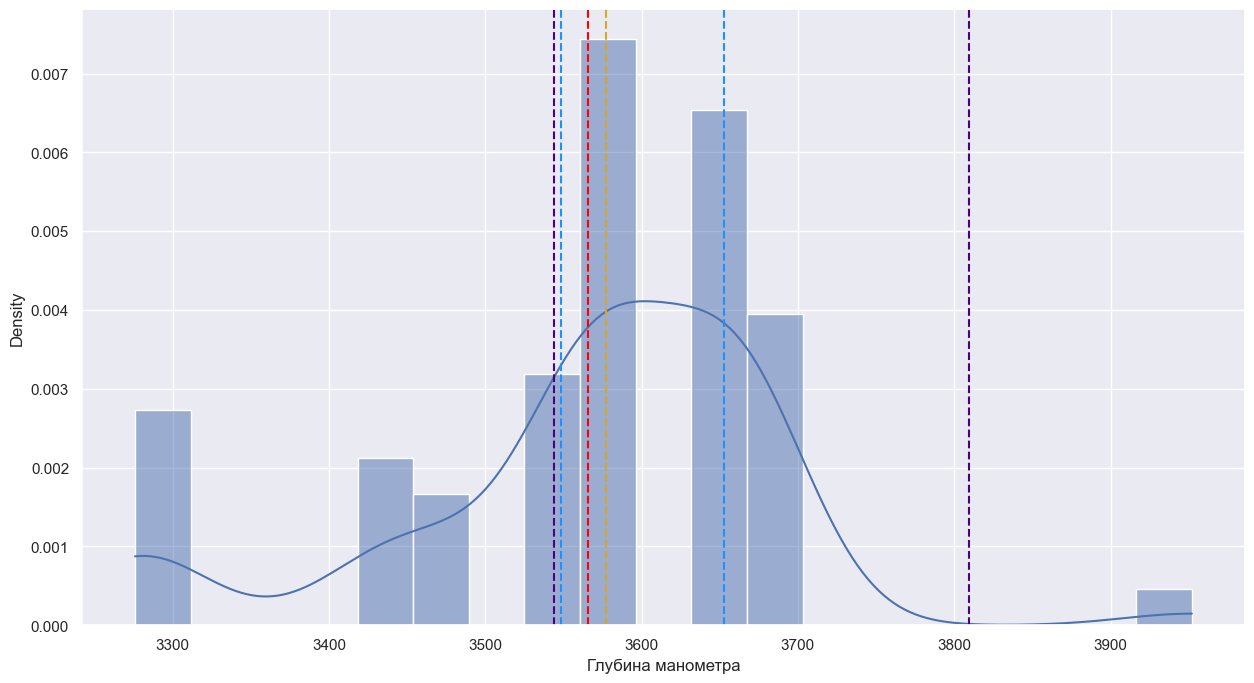

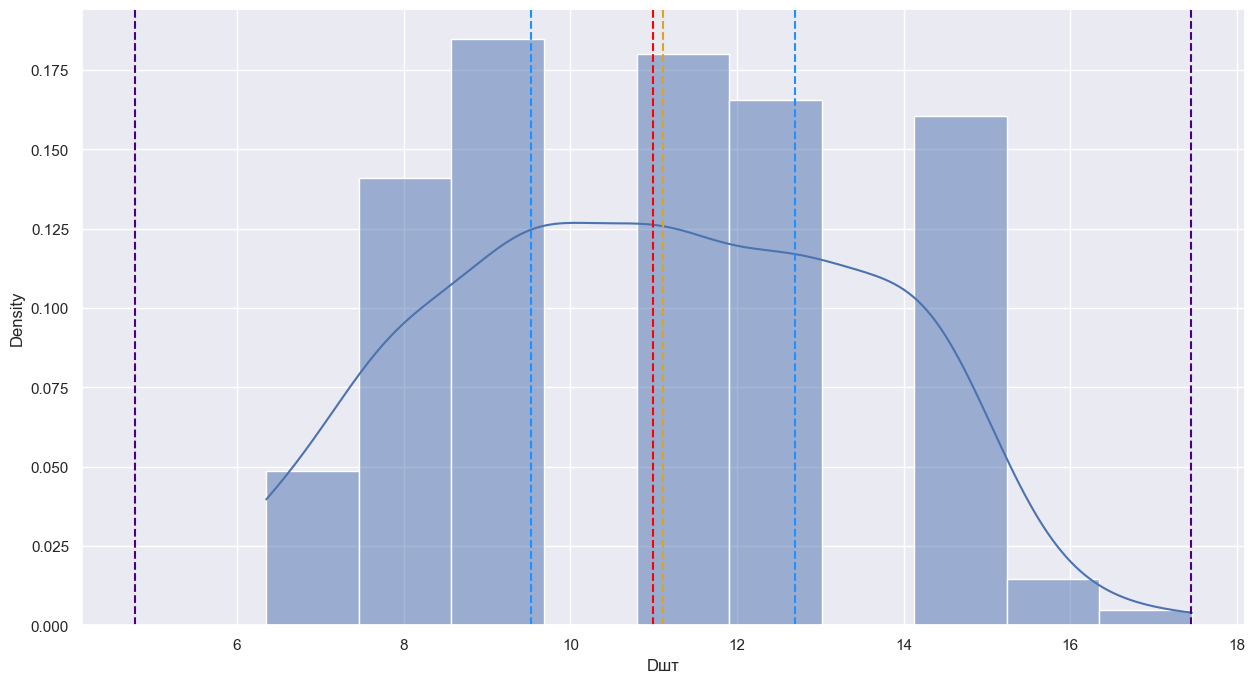

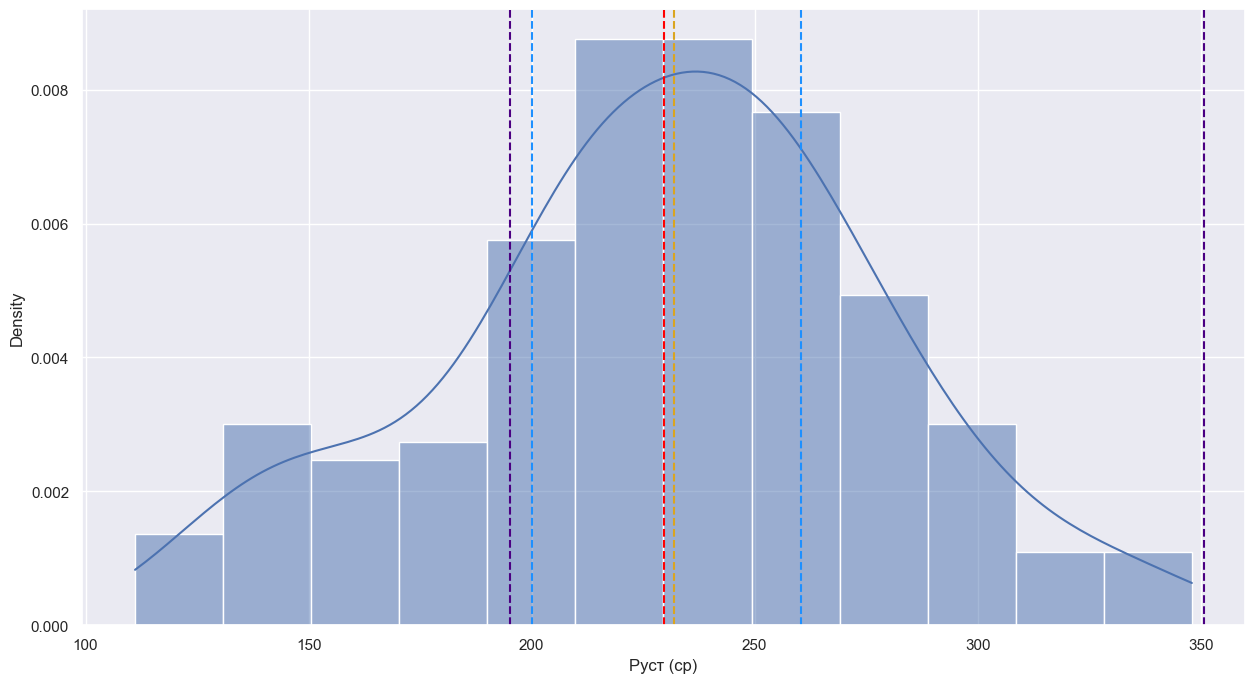

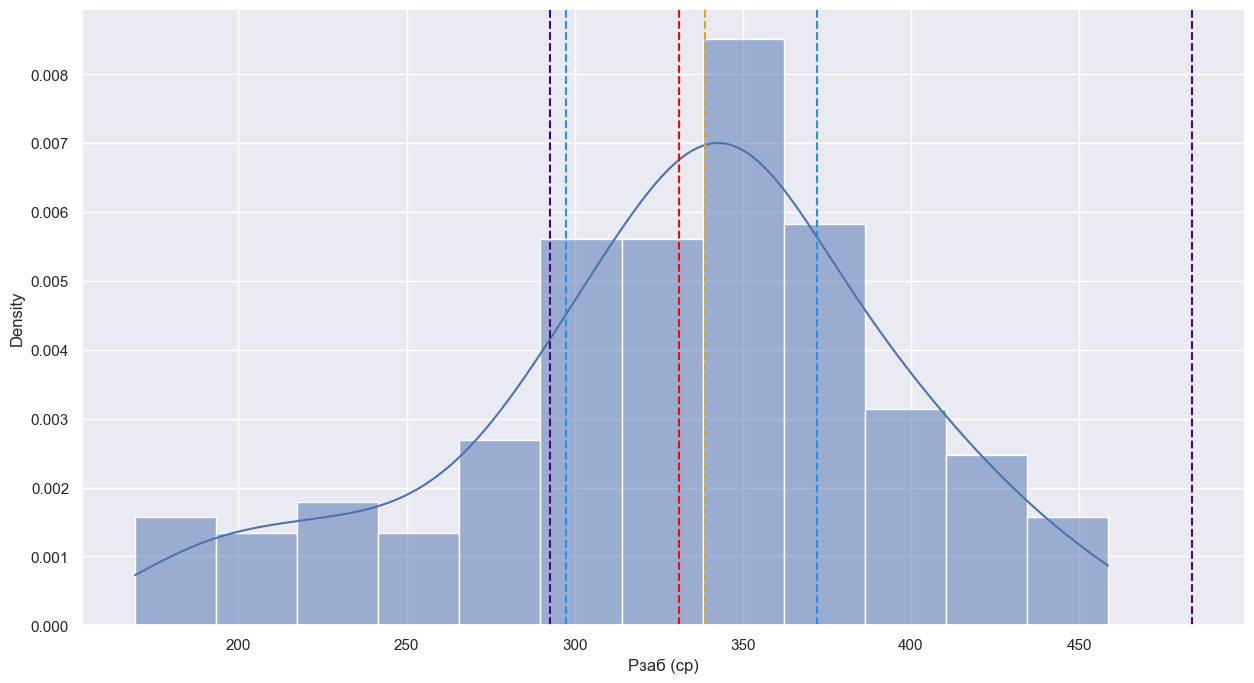

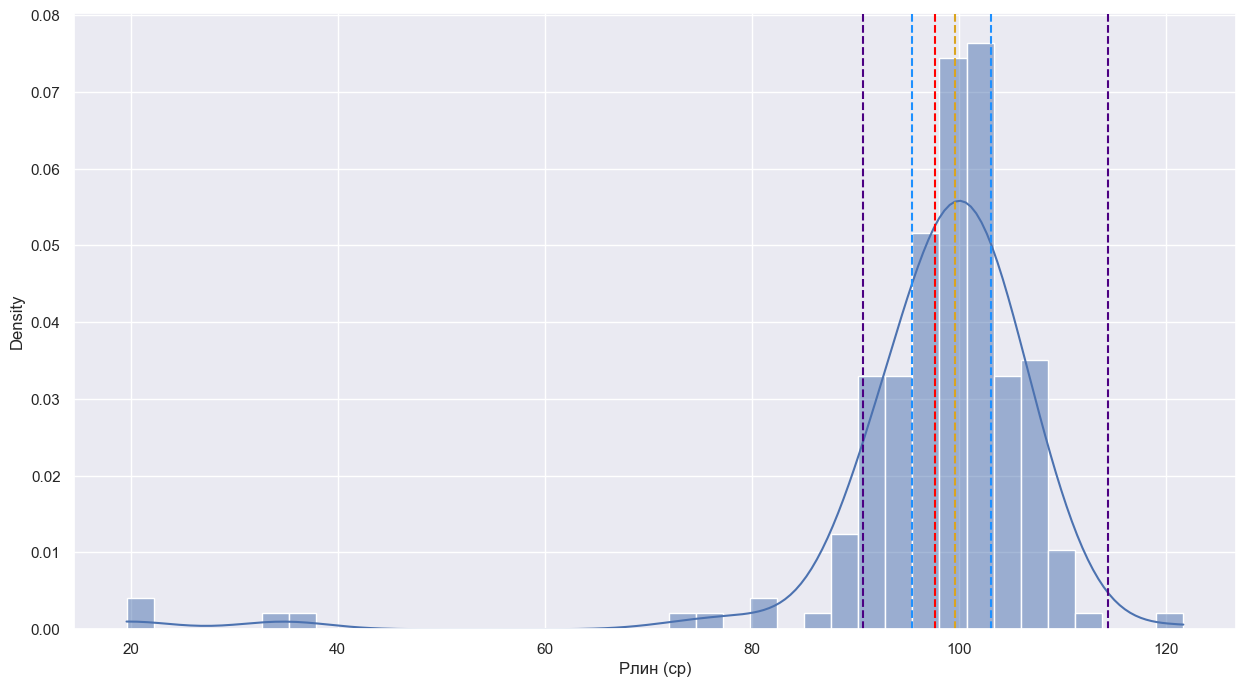

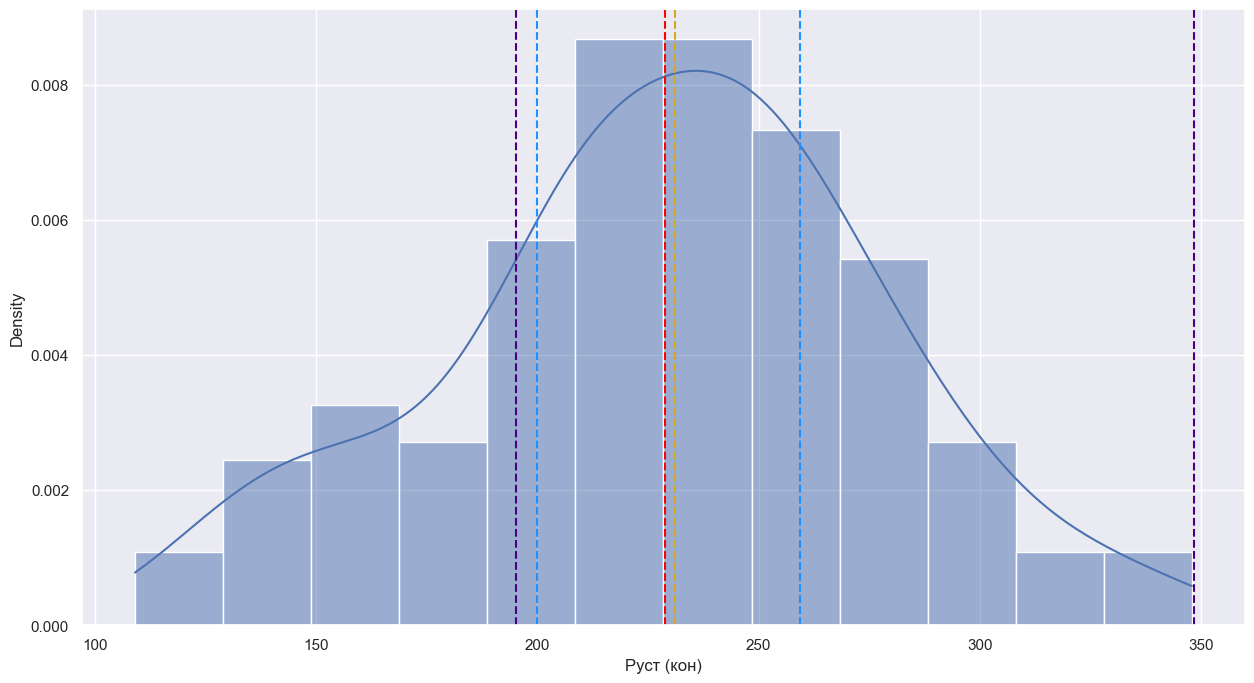

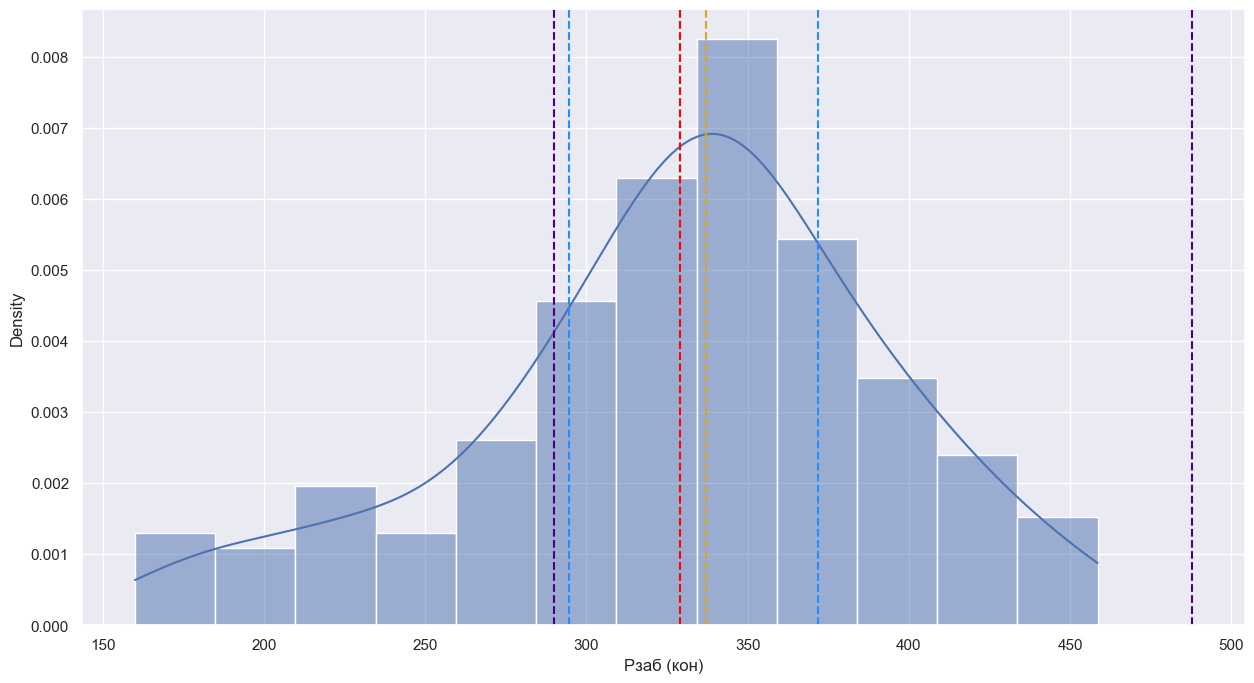

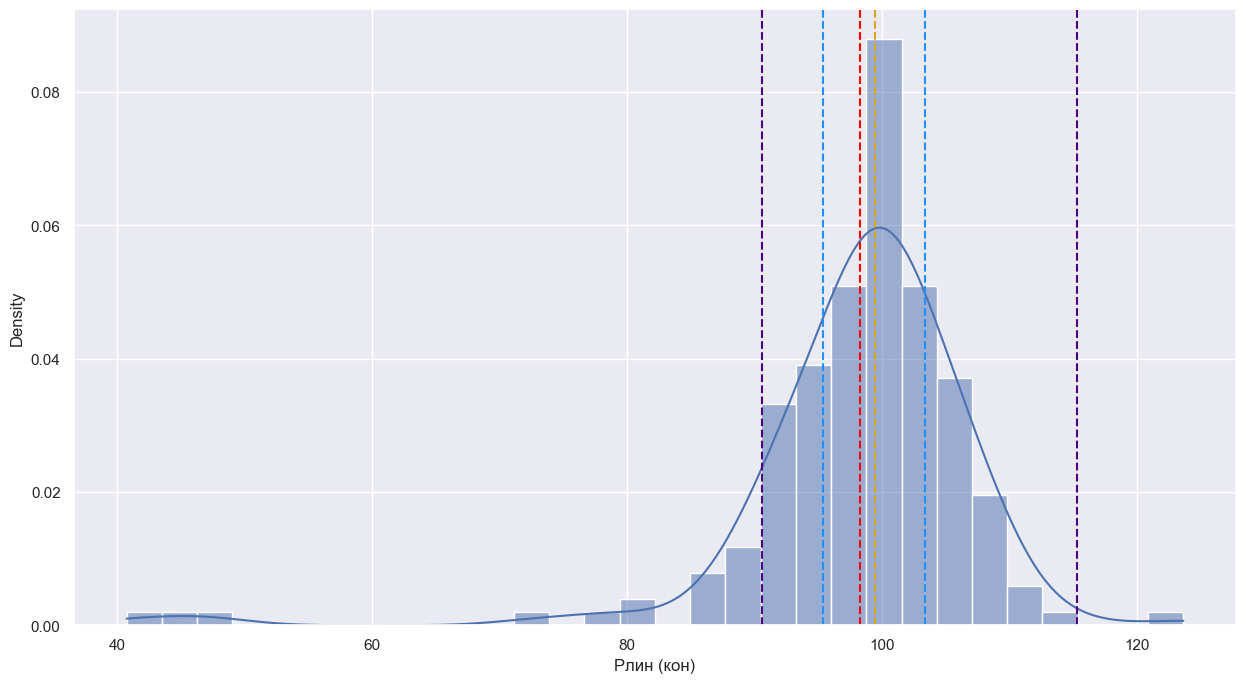

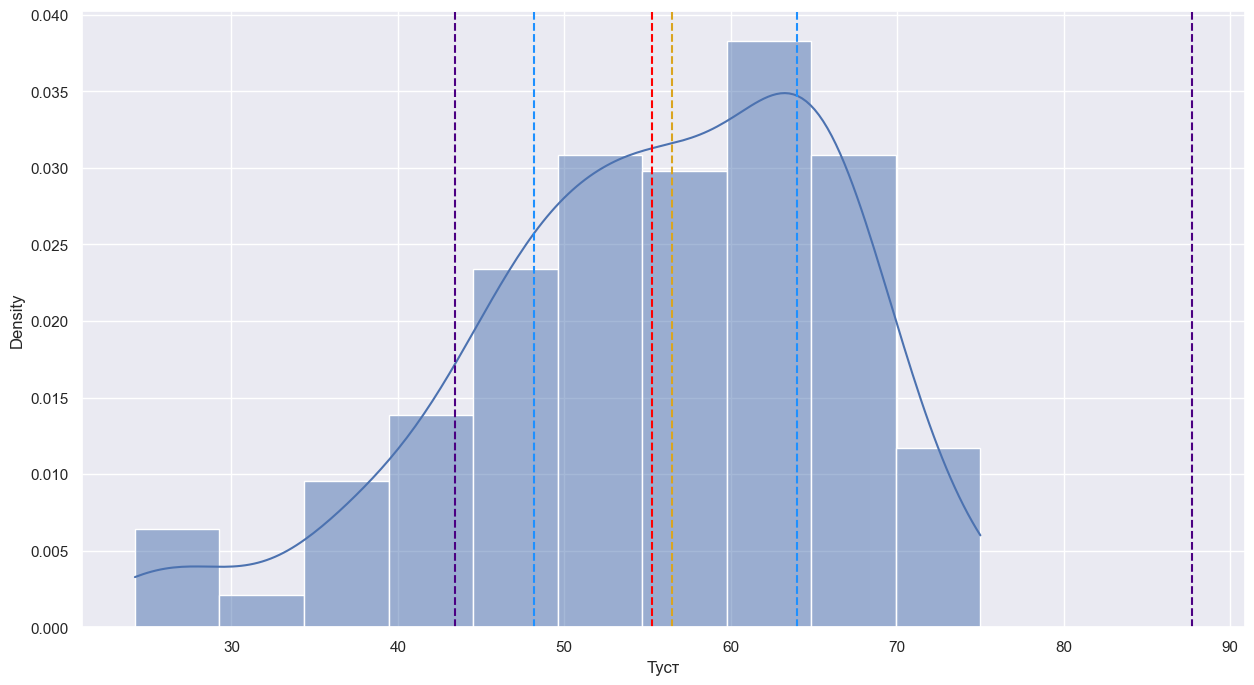

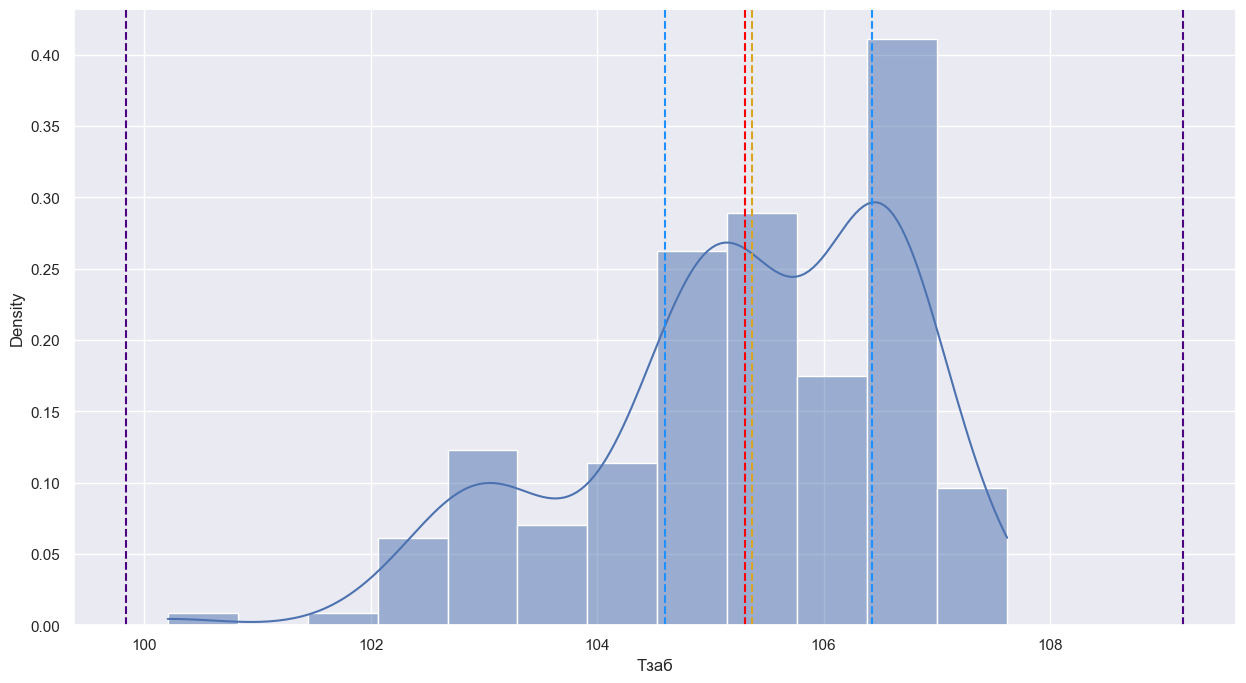

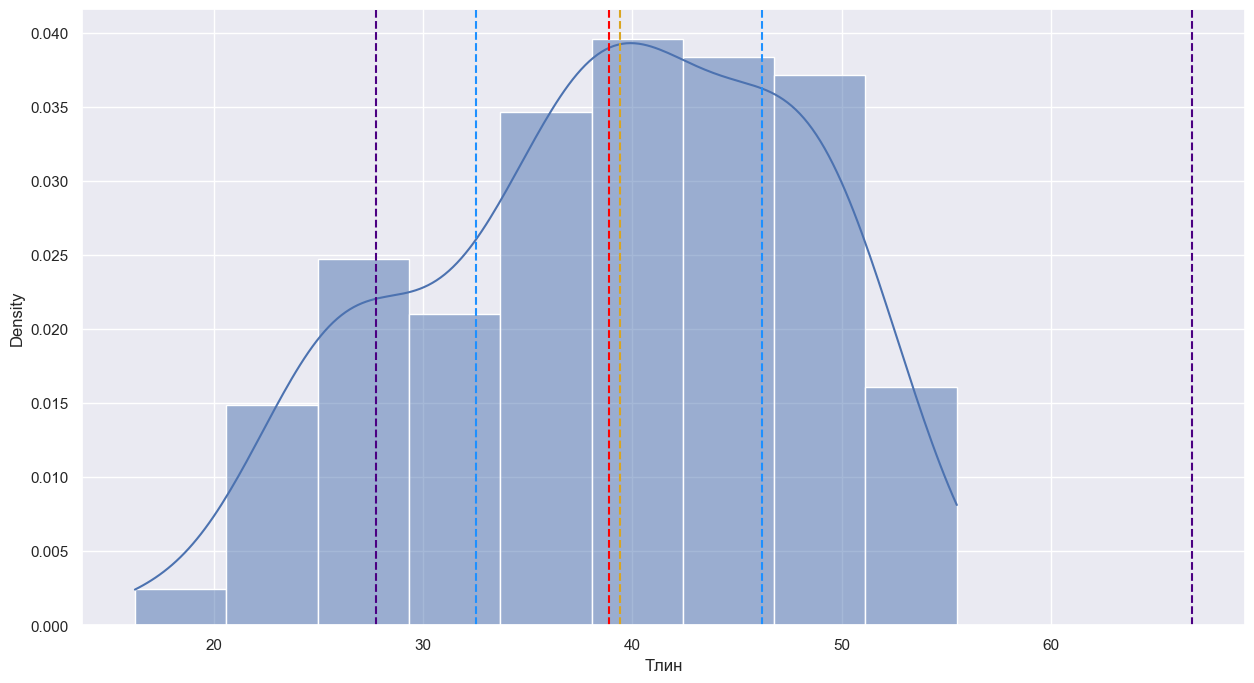

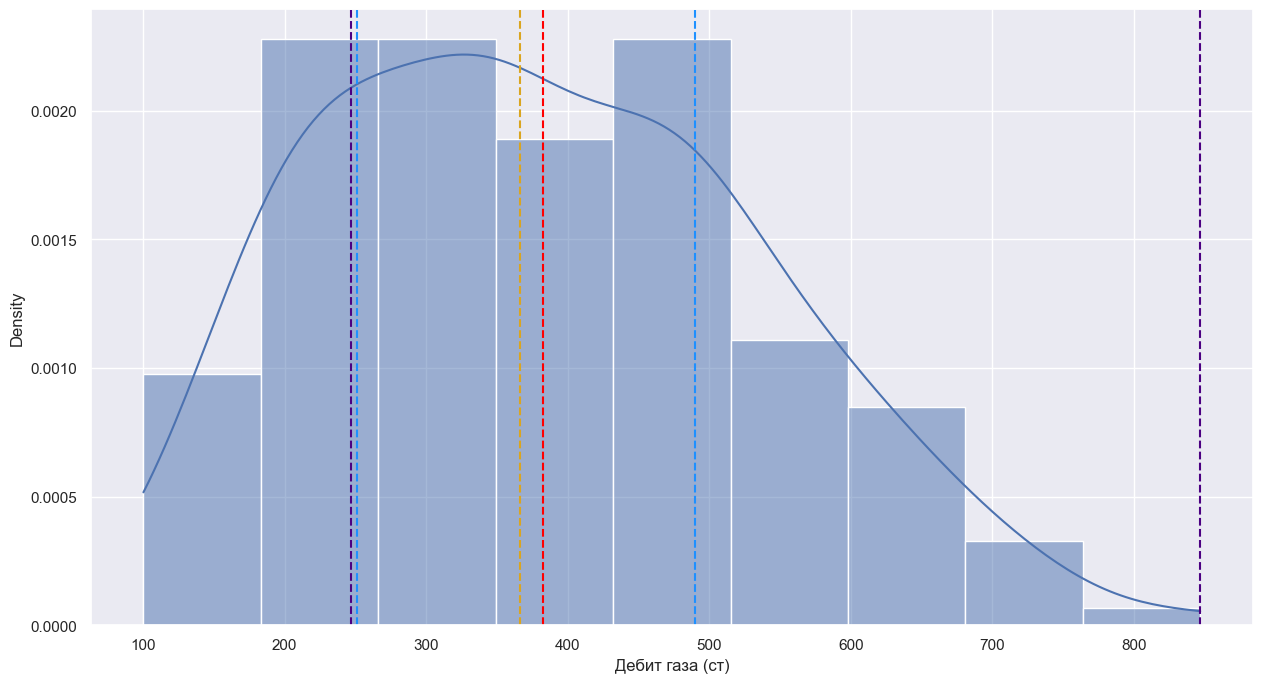

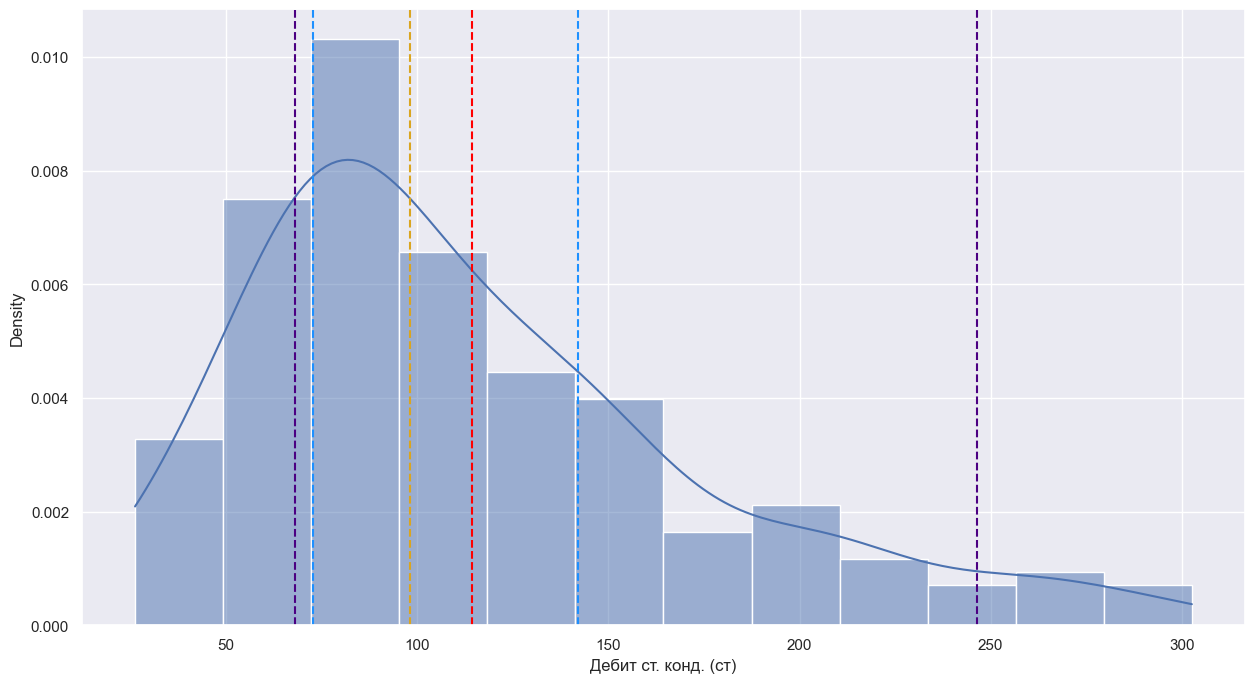

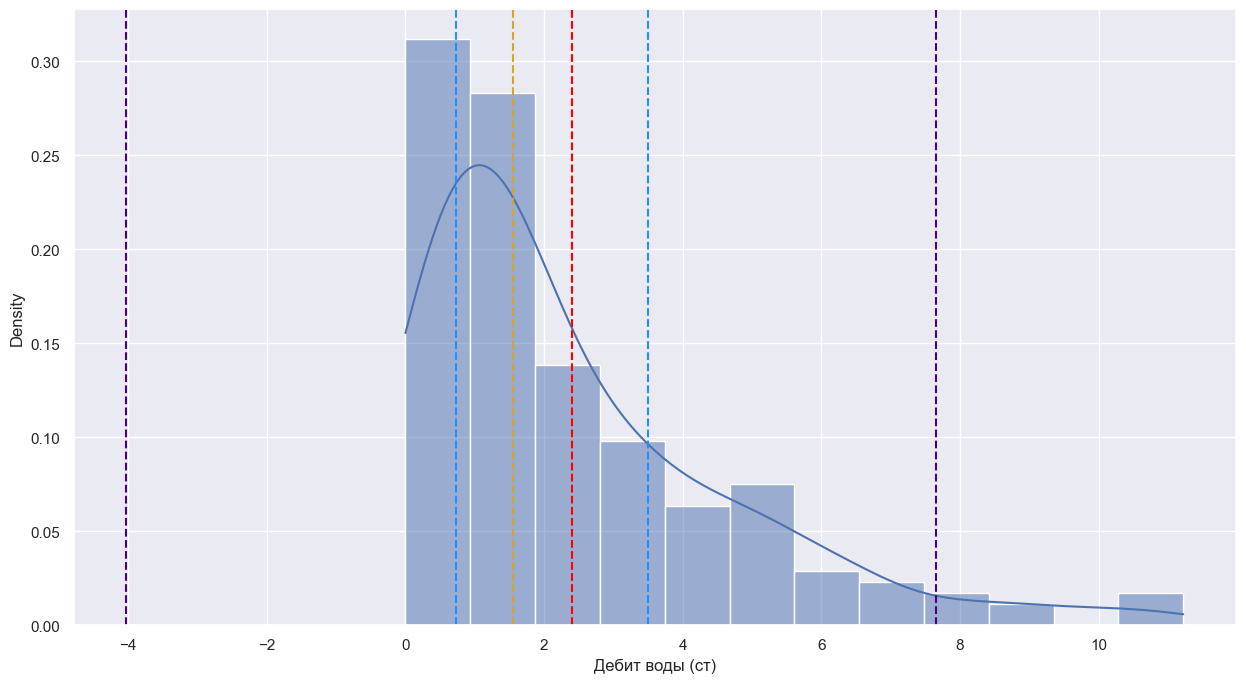

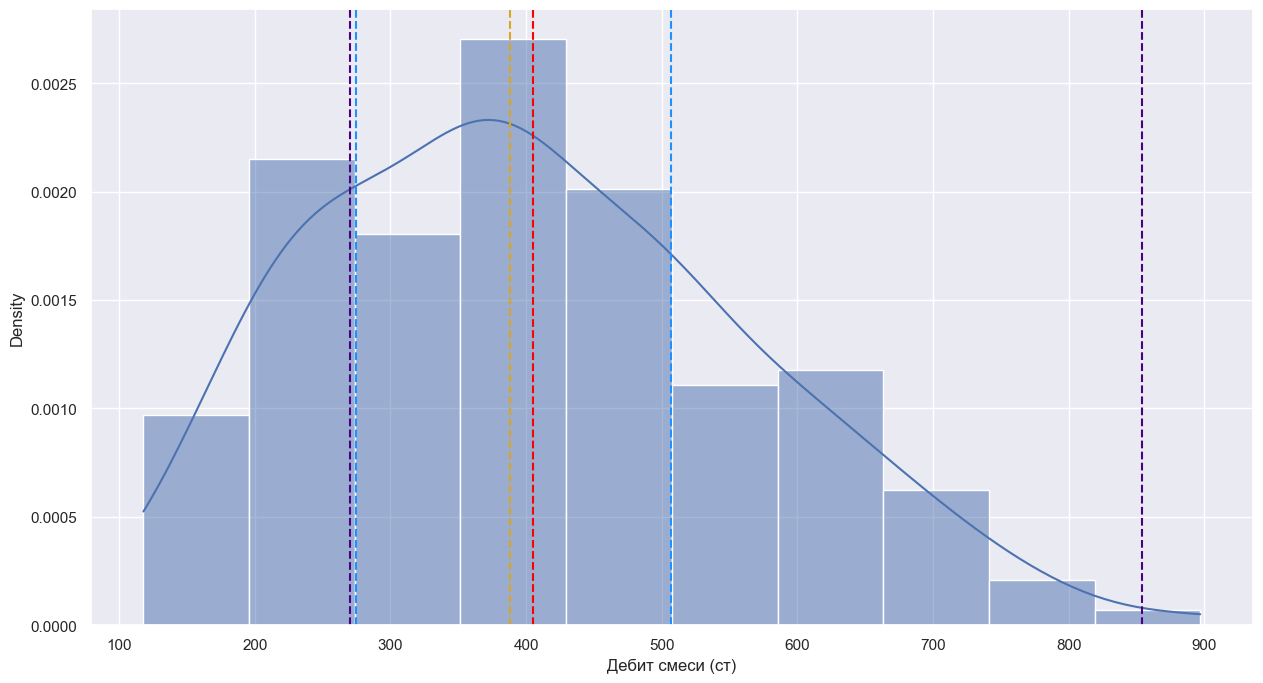

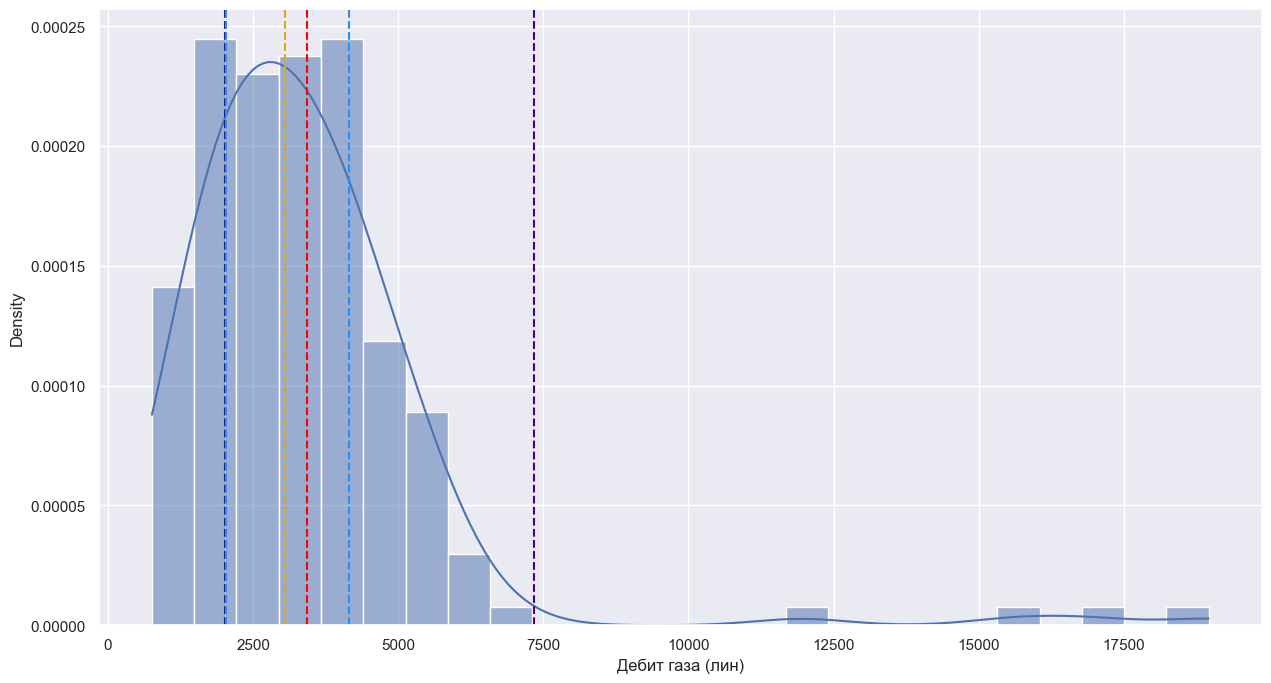

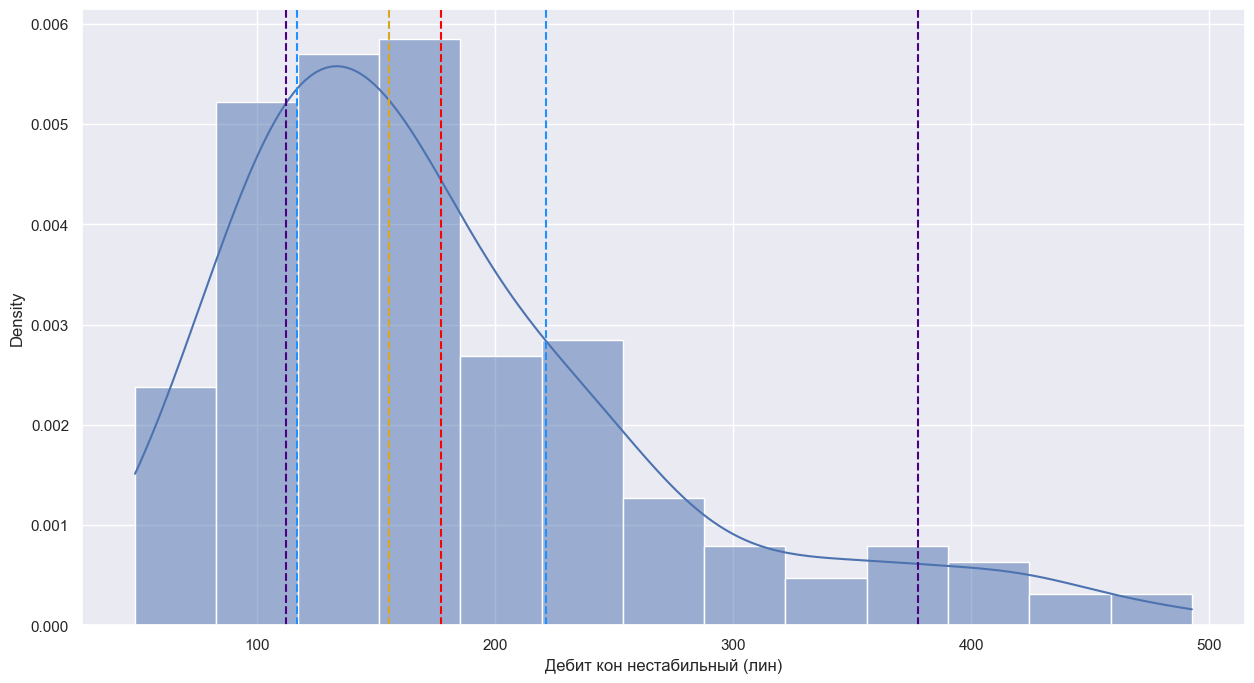

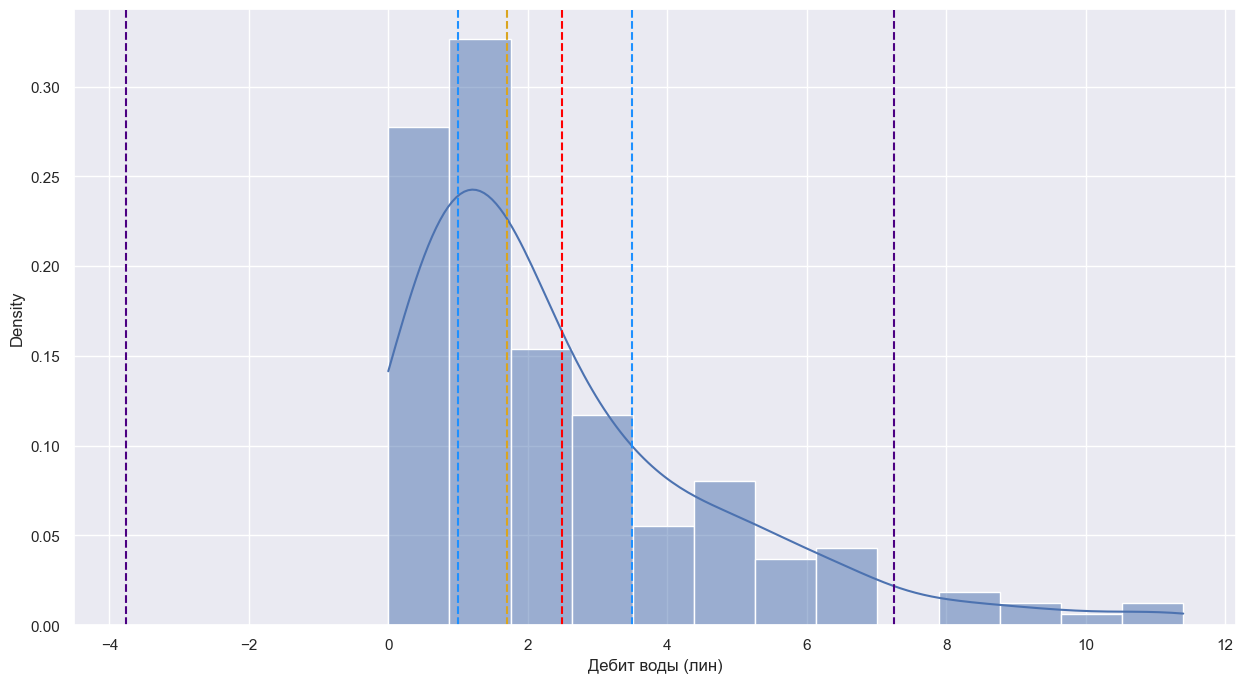

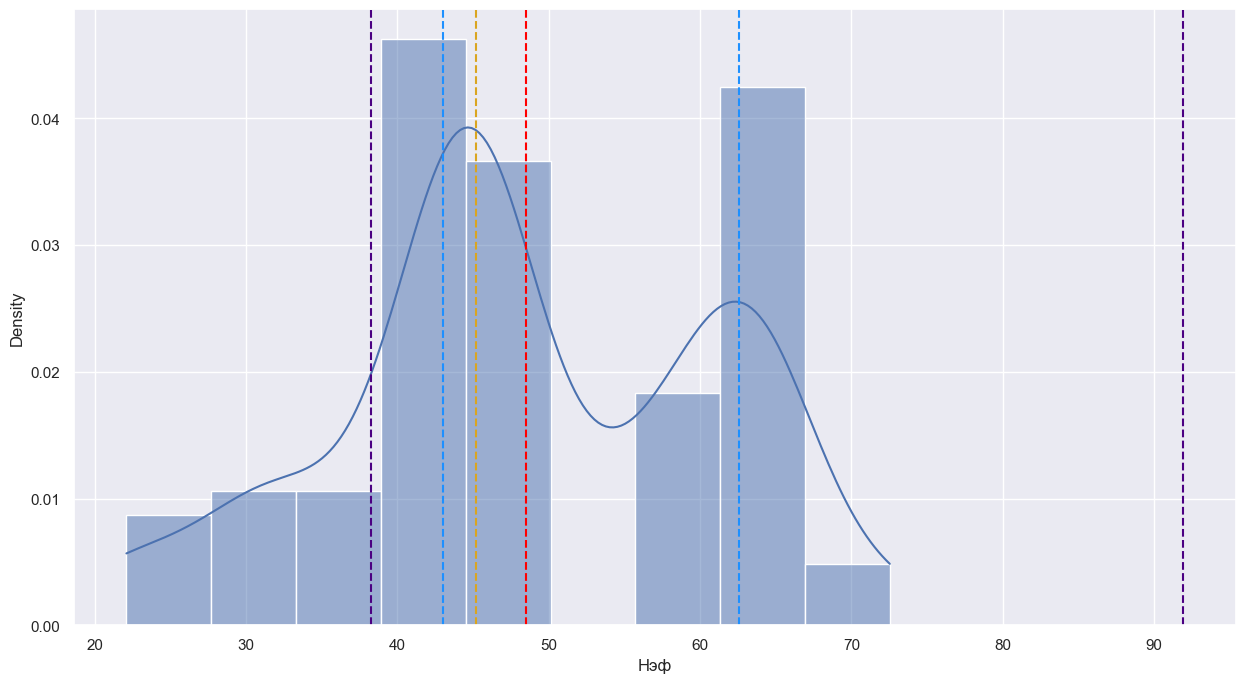

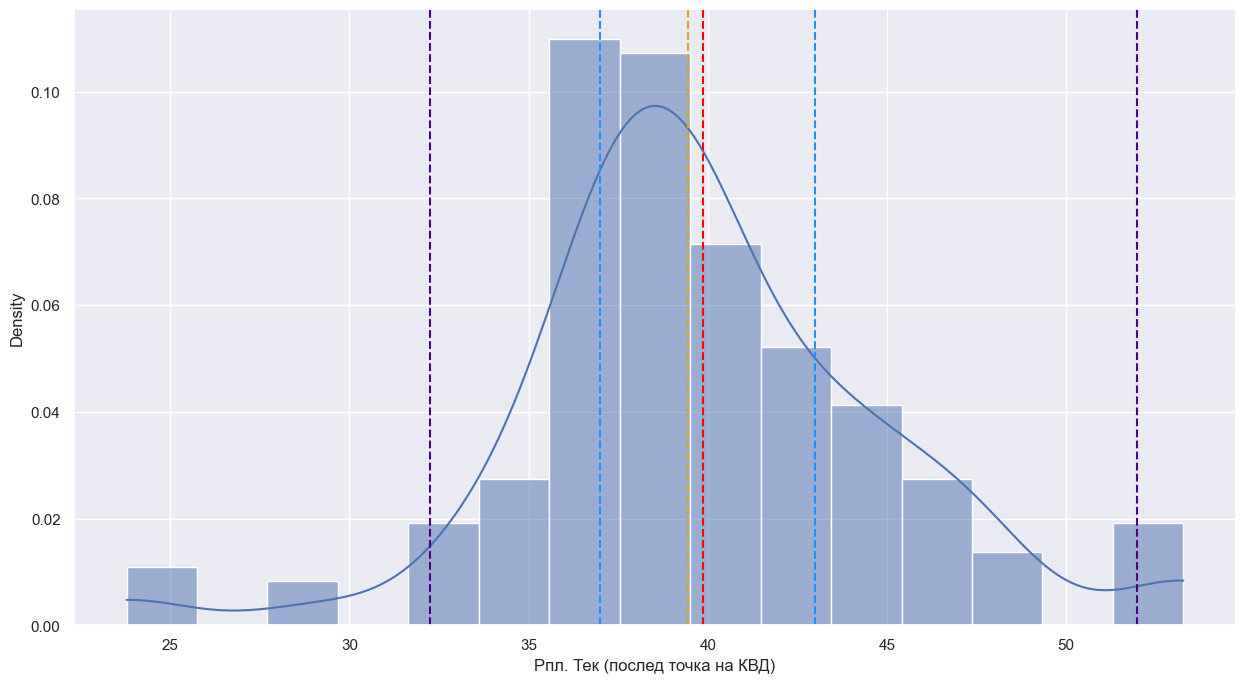

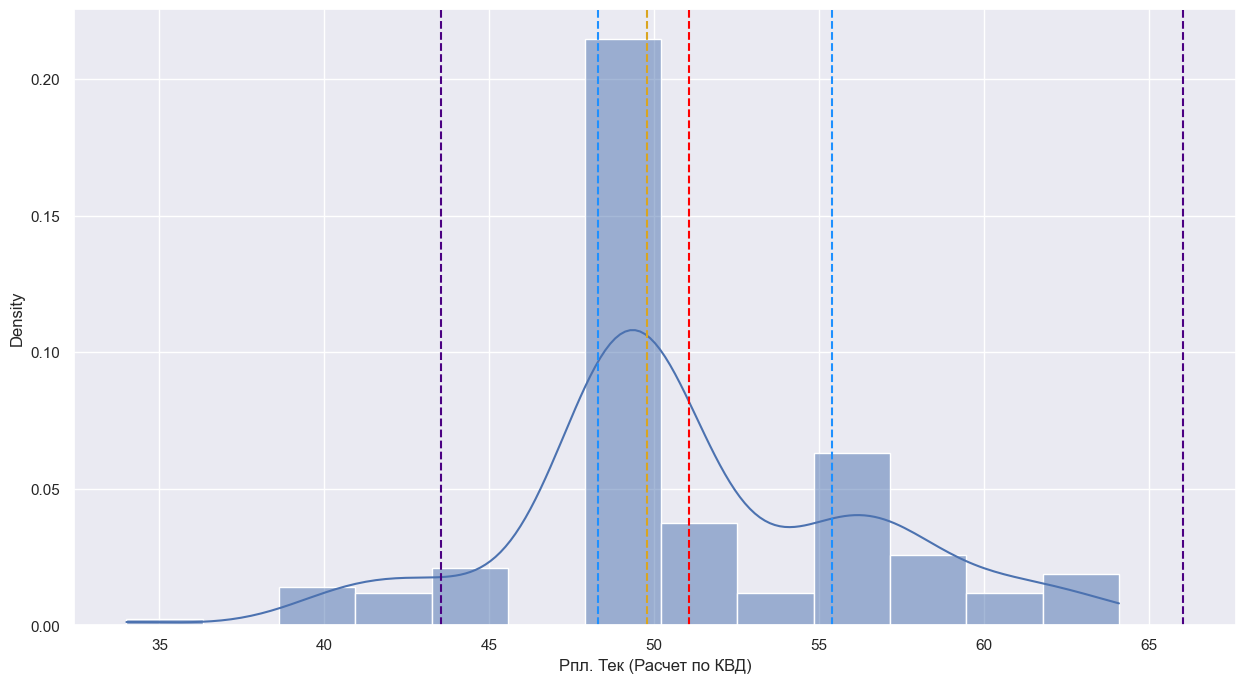

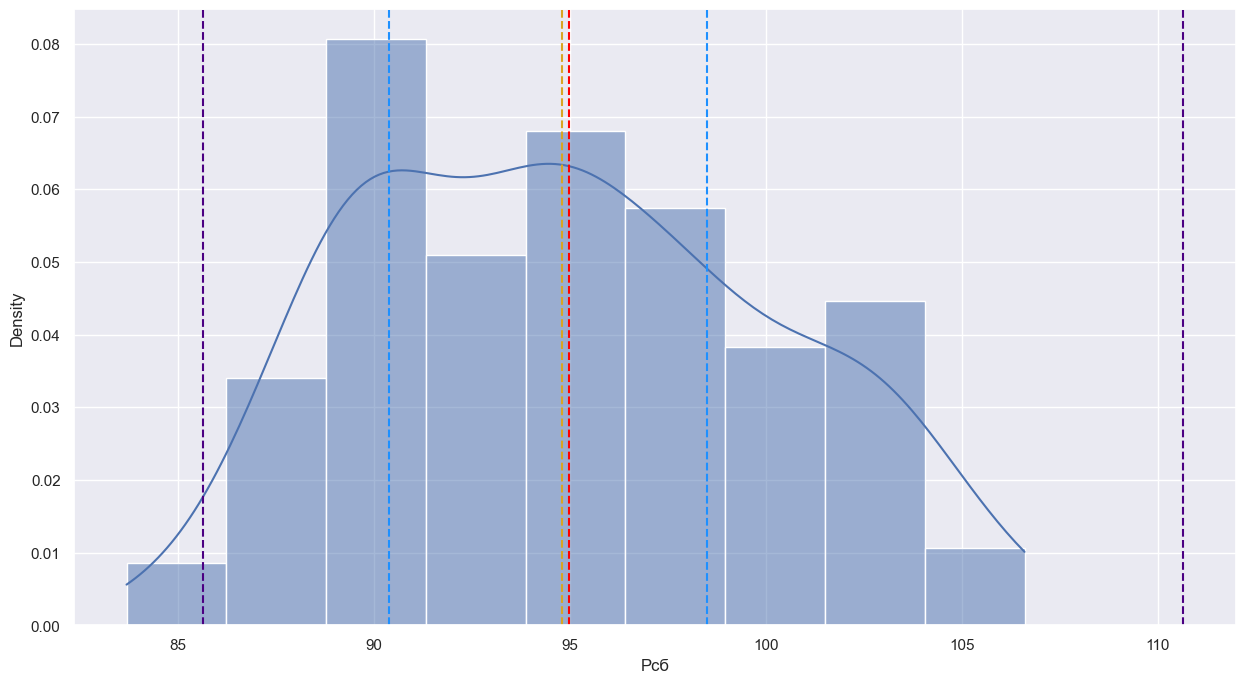

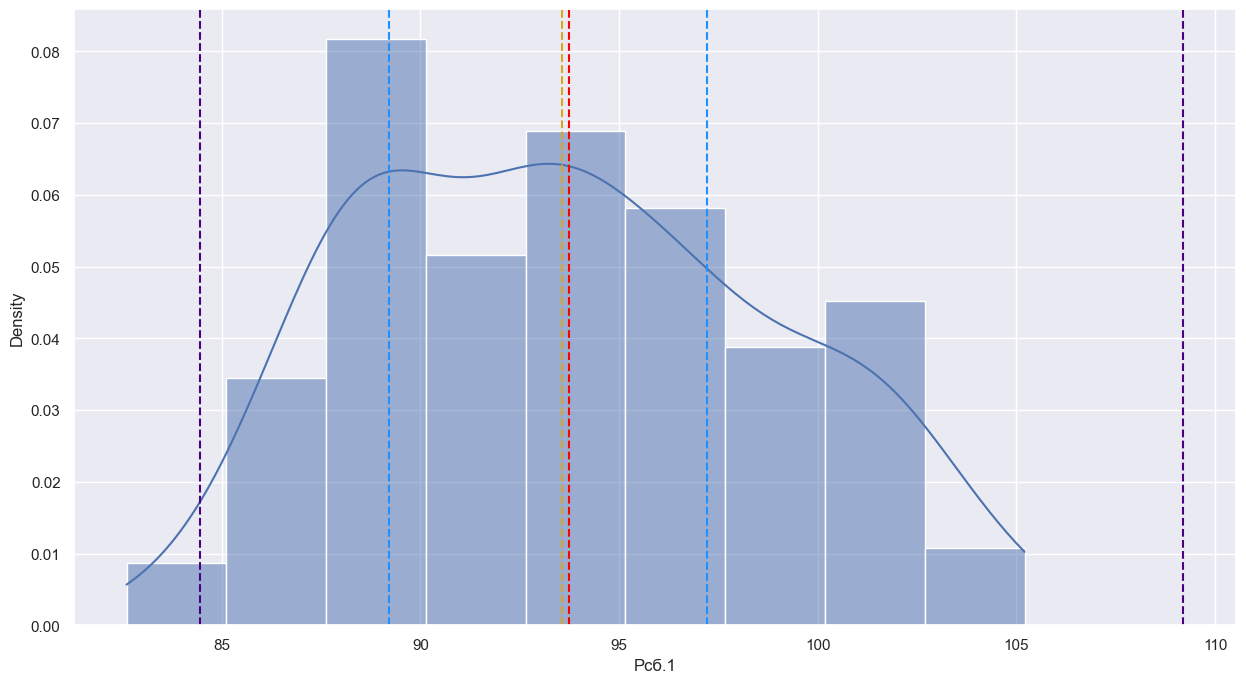

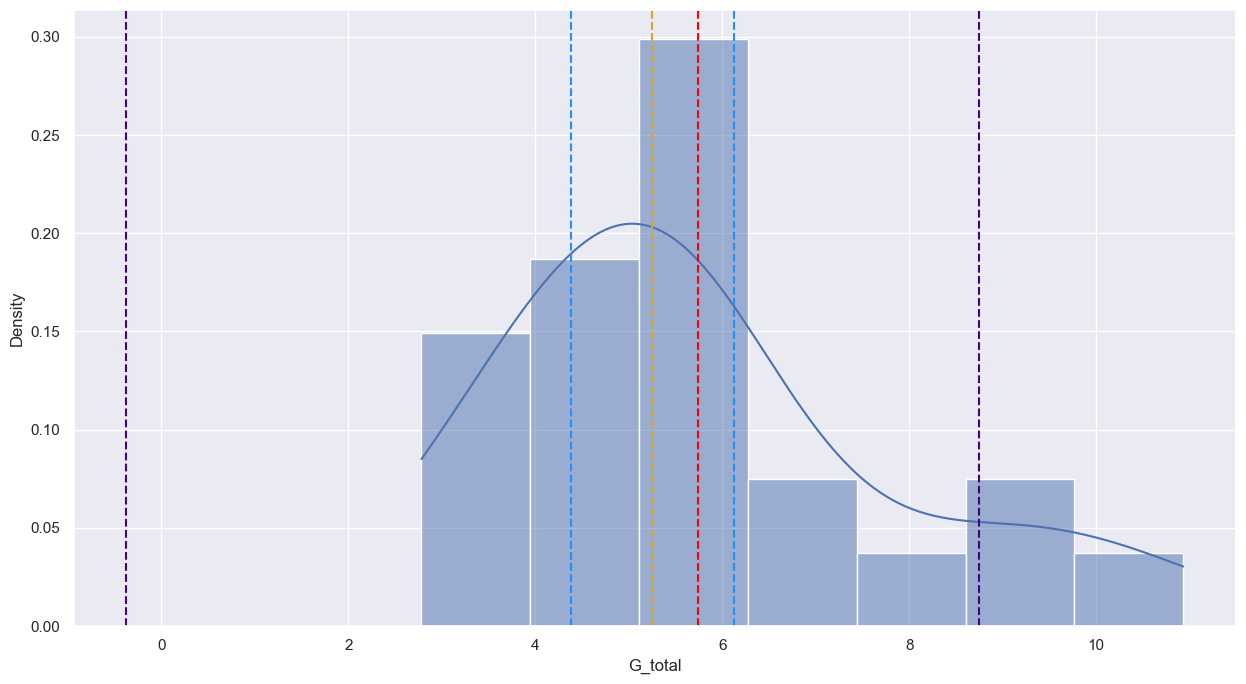

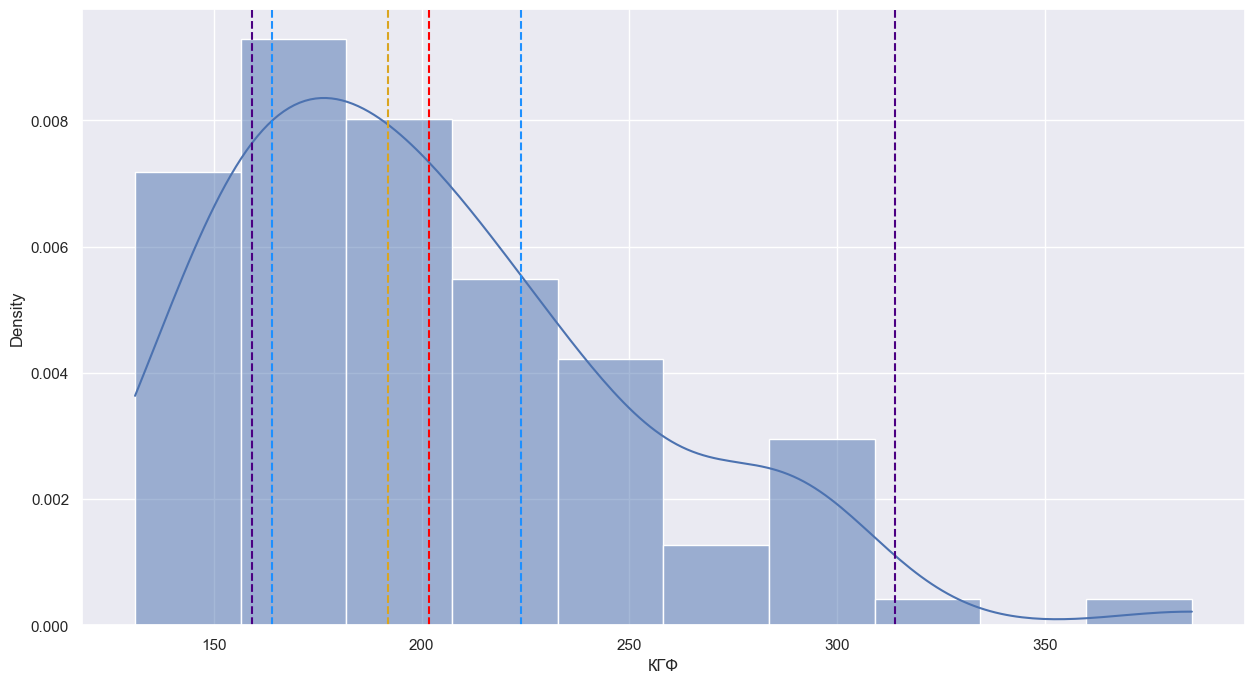

In [37]:
for i in df.columns:
    plt.figure(i)
    sns.histplot(df[i],kde=True,stat="density")
    plt.axvline(f.iloc[3][i]-1.5*f.iloc[10]["Dшт"], color="indigo", ls='--') #q1-1.5*iqr
    plt.axvline(f.iloc[3][i], color="dodgerblue", ls='--') #первый квартиль
    plt.axvline(f.iloc[4][i], color="red", ls='--') #среднее
    plt.axvline(f.iloc[5][i], color="goldenrod", ls='--') #медиана
    plt.axvline(f.iloc[6][i], color="dodgerblue", ls='--') #третий квартиль
    plt.axvline(f.iloc[6][i]+1.5*f.iloc[10][i], color="indigo", ls='--') #q3+1.5*iqr
    plt.show()

У признака "Удельная плотность газа" пороги слишком далекие, что лишний раз иллюстрирует, что отсекать через интерквартильный размах можно только при близком к нормальному распределении. Однозначно сказать, что слева наблюдается выброс нельзя из-за малого размера выборки. Это вполне может быть состояние потока со скважины.

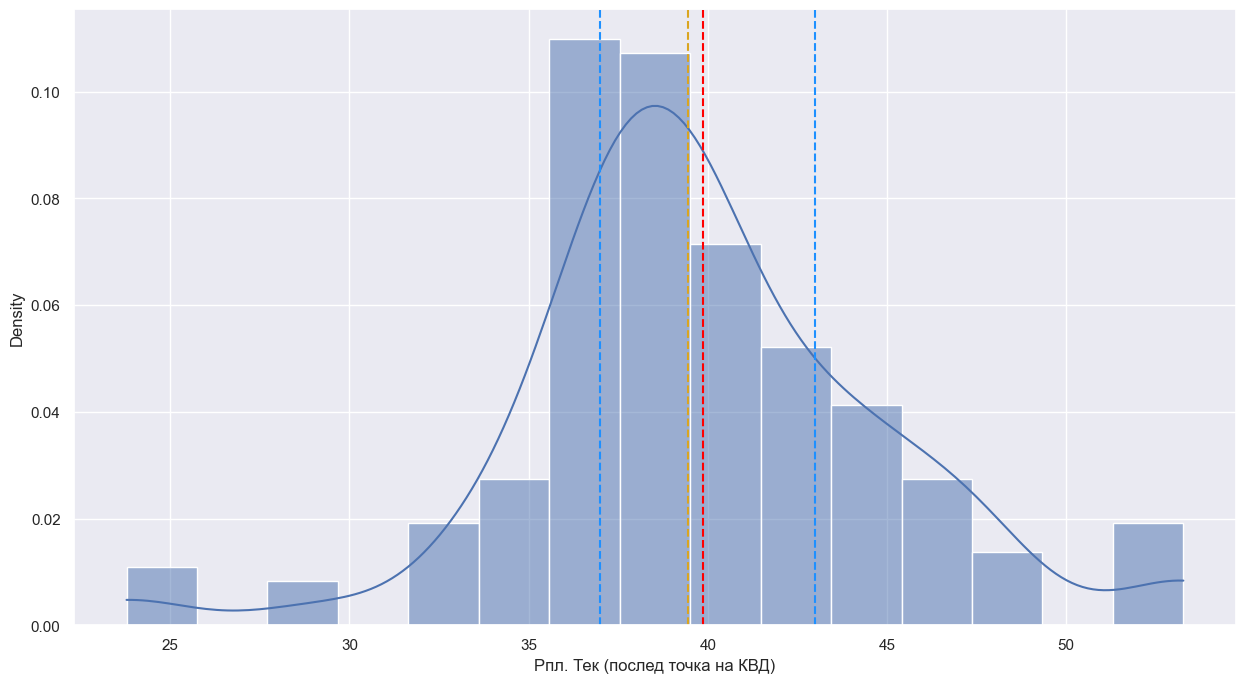

In [38]:
sns.histplot(df[df.columns[19]],kde=True,stat="density")
plt.axvline(f.iloc[3][df.columns[19]], color="dodgerblue", ls='--') #первый квартиль
plt.axvline(f.iloc[4][df.columns[19]], color="red", ls='--') #среднее
plt.axvline(f.iloc[5][df.columns[19]], color="goldenrod", ls='--') #медиана
plt.axvline(f.iloc[6][df.columns[19]], color="dodgerblue", ls='--') #третий квартиль

In [39]:
# df = df.drop(df[df['Ro_c'] < 200].index)

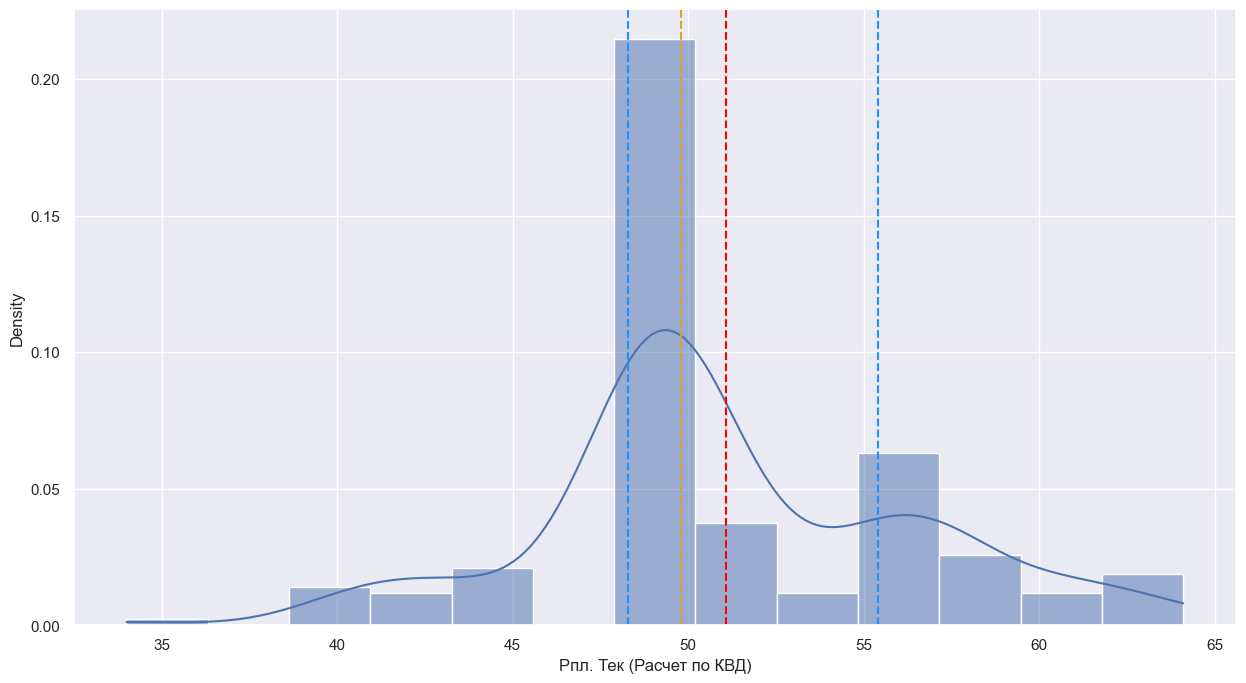

In [40]:
sns.histplot(df[df.columns[20]],kde=True,stat="density")
plt.axvline(f.iloc[3][df.columns[20]], color="dodgerblue", ls='--') #первый квартиль
plt.axvline(f.iloc[4][df.columns[20]], color="red", ls='--') #среднее
plt.axvline(f.iloc[5][df.columns[20]], color="goldenrod", ls='--') #медиана
plt.axvline(f.iloc[6][df.columns[20]], color="dodgerblue", ls='--') #третий квартиль

Удалим строки, где оба целевых признака не определены

In [41]:
df = df.drop(df[df['КГФ'].isnull() & df['G_total'].isnull()].index)

In [42]:
# def PrintStats(f):
C = len(df.columns)
L = len(df.index)
CN = df.count() #количество
NP = ((L - CN) / L) * 100 #процент пропущенных значений
MN = df.min(numeric_only=True) #минимум
Q1 = df.quantile(q=0.25, numeric_only=True) #первый квартиль
MA = df.mean(numeric_only=True) #среднее значение
ME = df.median(numeric_only=True) #медиана
Q3 = df.quantile(q=0.75, numeric_only=True) #третий квартиль
MX = df.max(numeric_only=True) #максимум
ST = df.std(numeric_only=True) #стандартное отклонение
P = df.nunique() #мощность
IQ = Q3 - Q1 #интерквартильный размах

frame = pd.concat([CN, NP, MN, Q1, MA, ME, Q3, MX, ST, P, IQ], axis=1, join="inner")
frame = frame.T
f = pd.DataFrame(frame)
f.index=['Количество', 'Процент пропусков', 'Минимум', 'Первый квартиль','Среднее', 'Медиана', 'Третий квартиль', 'Максимум','Стандартное отклонение', 'Мощность', 'Интерквартильный размах']
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
f1 = f.style.apply(lambda x: ["background-color:tomato" if i==1 else "" for i in x], axis=1, subset=(["Мощность"], slice(None))).apply(lambda x: ["background-color:tomato" if i>=60 else "" for i in x], axis=1, subset=(["Процент пропусков"], slice(None))).apply(lambda x: ["background-color:steelblue" if (i<30 and i>0) else "" for i in x], axis=1, subset=(["Процент пропусков"], slice(None))).apply(lambda x: ["background-color:limegreen" if i==0 else "" for i in x], axis=1, subset=(["Процент пропусков"], slice(None)))
display(f1)

,Глубина манометра,Dшт,Руст (ср),Рзаб (ср),Pлин (ср),Руст (кон),Рзаб (кон),Рлин (кон),Туст,Тзаб,Tлин,Дебит газа (ст),Дебит ст. конд. (ст),Дебит воды (ст),Дебит смеси (ст),Дебит газа (лин),Дебит кон нестабильный (лин),Дебит воды (лин),Нэф,Рпл. Тек (послед точка на КВД),Рпл. Тек (Расчет по КВД),Pсб,Pсб.1,G_total,КГФ
Количество,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,23.000000,93.000000
Процент пропусков,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,75.268817,0.000000
Минимум,3276.000000,6.350000,138.157895,174.000000,73.306638,136.000000,174.000000,40.739839,24.200000,100.210000,16.204686,128.365641,33.629767,0.000000,136.815245,884.000000,59.800000,0.000000,30.000000,29.170000,39.900000,85.500000,84.381939,2.782623,131.000000
Первый квартиль,3437.000000,9.530000,201.636750,298.690000,95.945951,200.000000,296.800000,95.335032,50.300000,104.600000,33.688653,287.950295,69.900000,0.700000,309.001660,2223.000000,116.800000,0.700000,44.200000,37.210000,48.300000,90.700000,89.513940,4.381813,164.000000
Среднее,3525.809677,10.951183,228.293412,331.990273,99.860962,227.644269,330.549462,98.005453,56.172043,104.974581,39.798184,394.402772,99.909533,2.132827,415.779340,3282.971050,164.151613,2.163441,52.703325,40.616059,50.796112,95.162366,93.917953,5.742359,201.705968
Медиана,3577.500000,11.110000,229.894737,338.830800,100.800000,228.000000,335.500000,100.260000,58.000000,105.160000,40.519491,383.719622,89.800000,1.400000,388.184439,3112.000000,143.500000,1.400000,56.800000,39.440000,49.800000,94.200000,92.968172,5.250915,192.000000
Третий квартиль,3650.000000,12.700000,252.000000,362.800000,103.865199,252.000000,359.900000,104.000000,64.000000,105.560000,47.800000,489.673000,117.600000,3.200000,506.459420,4165.000000,185.200000,3.300000,63.500000,42.860000,54.900000,99.800000,98.494942,6.125723,224.000000
Максимум,3670.000000,15.880000,337.108108,458.600000,121.682930,333.000000,458.500000,123.616800,75.000000,107.071000,55.513904,846.816143,302.621077,8.340288,896.908271,6943.100000,492.800000,8.100000,72.539800,53.270000,56.700000,104.000000,102.640020,10.931155,385.415949
Стандартное отклонение,142.416207,2.423172,41.897238,55.566902,7.300663,41.757127,55.443651,12.425851,11.250781,1.232515,8.937669,150.354801,49.140664,1.874972,154.391514,1353.043667,85.225100,1.903132,12.149424,5.233865,4.101051,5.136060,5.068897,2.112717,49.253925
Мощность,21.000000,10.000000,87.000000,89.000000,91.000000,73.000000,90.000000,88.000000,51.000000,68.000000,89.000000,93.000000,92.000000,77.000000,90.000000,92.000000,90.000000,42.000000,14.000000,21.000000,19.000000,70.000000,70.000000,23.000000,72.000000


# Тепловая карта

<Axes: >

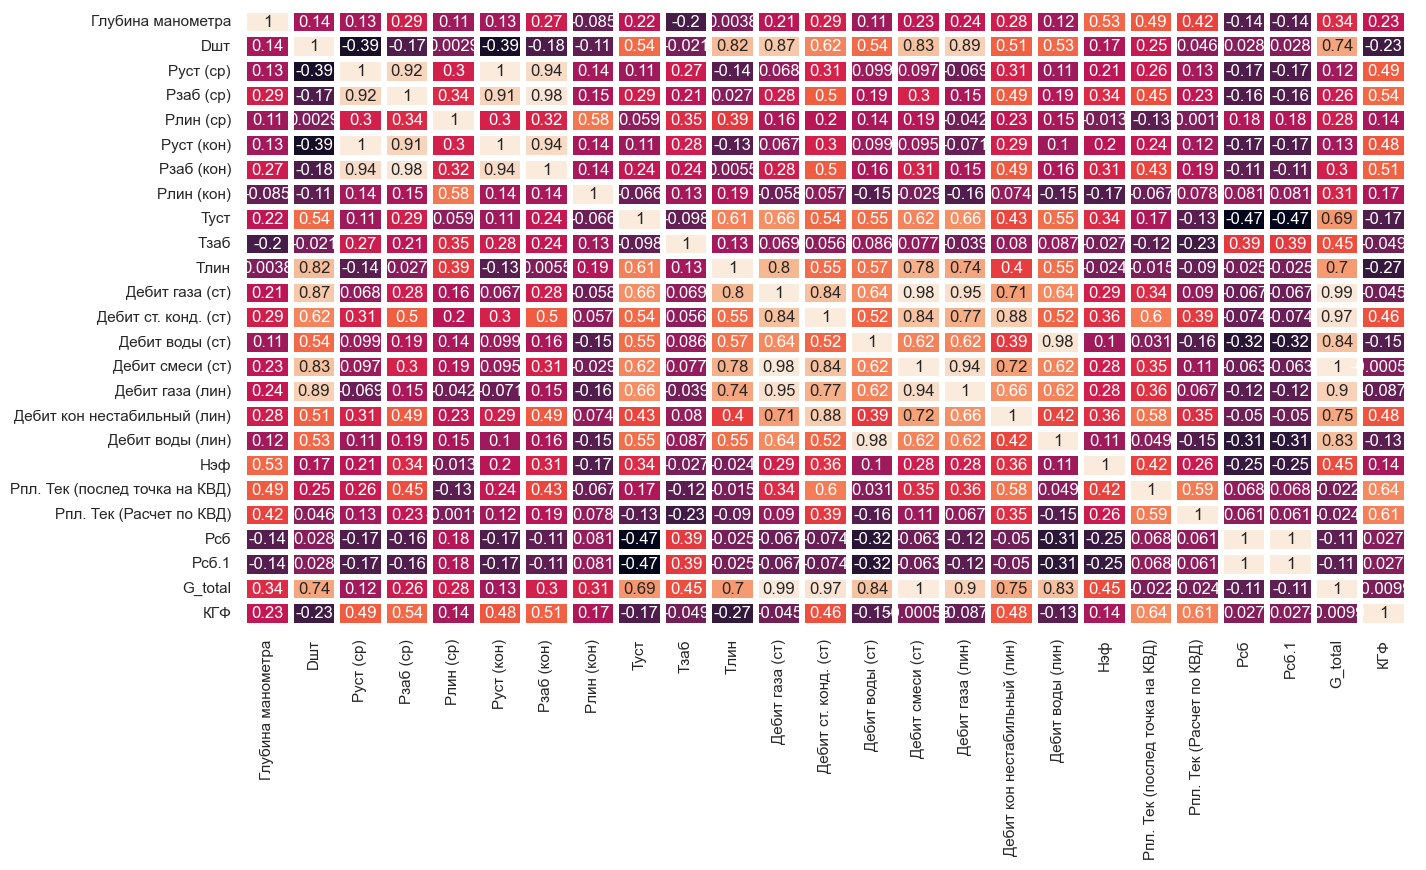

In [43]:
sns.set(rc = {'figure.figsize':(15,8)})
sns.heatmap(df.corr(), annot=True, linewidths=3, cbar=False)

# Важность признаков

Рассмотрим признаки с коэффициентом корреляции не ниже 0.95

Руст (ср) - Руст (кон)
Рзаб (кон) - Рзаб (ср)
Рсб - Рсб.1
Дебит смеси (ст) - Дебит газа (ст)
Лебит газа (ст) - Дебит газа (лин)
Дебит смеси (ст) - Дебит газа (лин)

## Gain ratio

### G_total

<Axes: >

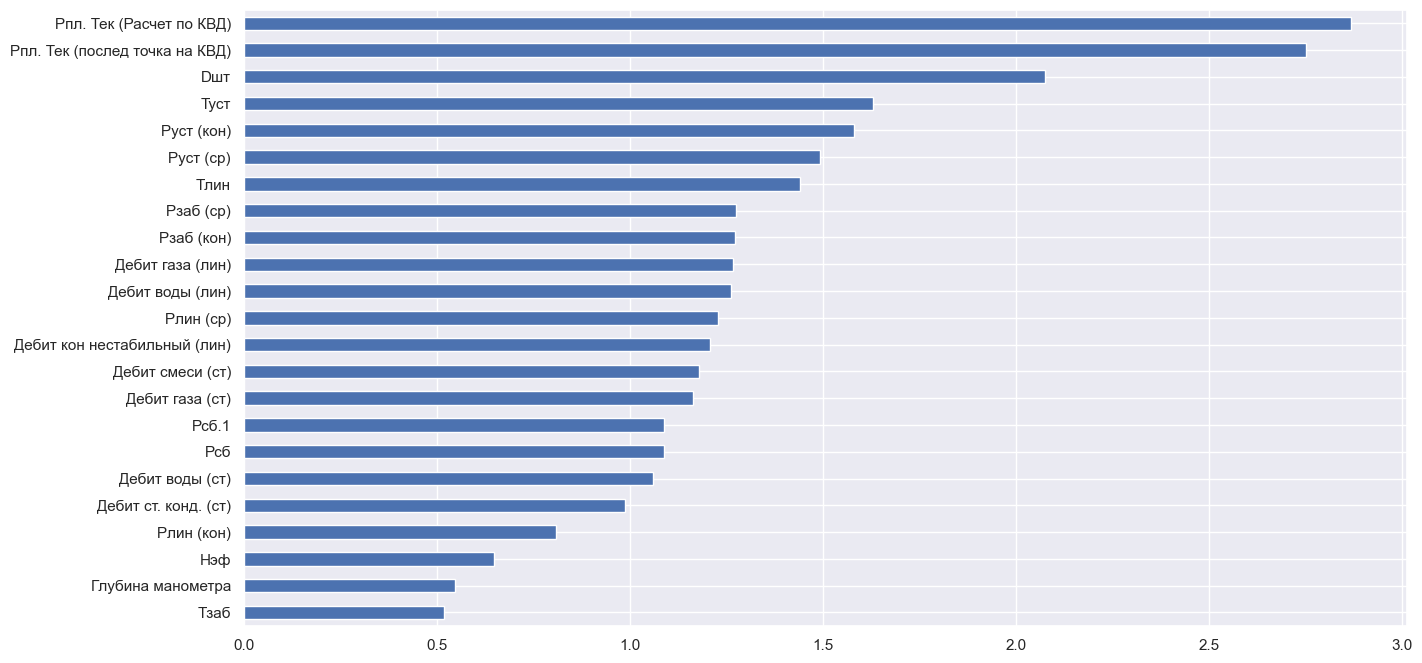

In [44]:
G_feature_importance = gr.data_set_gain_ratio(df, df.columns[-2], 2)
G_feature_importance.sort_values(inplace=True)
G_feature_importance.plot(kind = 'barh')

Для G_total оставляем выделенные жирным признаки:

Руст (ср) - __Руст (кон)__
Рзаб (кон) - __Рзаб (ср)__
__Рсб__ - Рсб.1
__Дебит смеси (ст)__ - Дебит газа (ст)
Дебит газа (ст) - __Дебит газа (лин)__
Дебит смеси (ст) - __Дебит газа (лин)__

### КГФ

<Axes: >

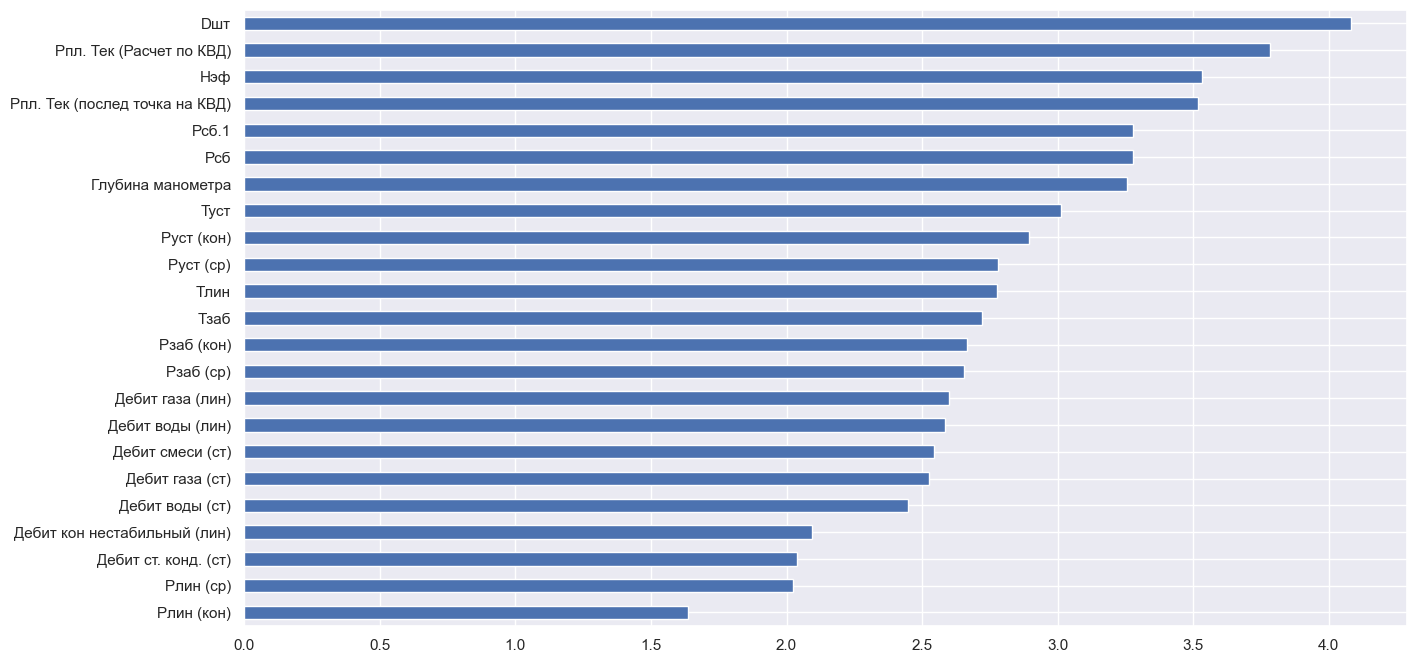

In [45]:
K_feature_importance = gr.data_set_gain_ratio(df, df.columns[-1], 2)
K_feature_importance.sort_values(inplace=True)
K_feature_importance.plot(kind='barh')

Для КГФ оставляем выделенные жирным признаки:

Руст (ср) - __Руст (кон)__
Рзаб (кон) - __Рзаб (ср)__
__Рсб__ - Рсб. 1
__Дебит смеси (ст)__ - Дебит газа (ст)
Дебит газа (ст) - __Дебит газа (лин)__
Дебит смеси (ст) - __Дебит газа (лин)__

In [46]:
df = df.drop(['Руст (ср)', 'Рзаб (кон)', 'Pсб.1', 'Дебит газа (ст)', 'Дебит газа (ст)'], axis=1)
df_not_norm = df

In [63]:
f = open('norm_params.txt', 'w')
f.write(str(df_not_norm['G_total'].min()) + '\n')
f.write(str(df_not_norm['G_total'].max()) + '\n')
f.write(str(df_not_norm['КГФ'].min()) + '\n')
f.write(str(df_not_norm['КГФ'].max()) + '\n')
f.close()

In [49]:
df = (df - df.min()) / (df.max() - df.min())

In [54]:
df = df.sort_values(by='G_total')
display(df)

,Глубина манометра,Dшт,Рзаб (ср),Pлин (ср),Руст (кон),Рлин (кон),Туст,Тзаб,Tлин,Дебит ст. конд. (ст),Дебит воды (ст),Дебит смеси (ст),Дебит газа (лин),Дебит кон нестабильный (лин),Дебит воды (лин),Нэф,Рпл. Тек (послед точка на КВД),Рпл. Тек (Расчет по КВД),Pсб,G_total,КГФ
0,0.762183,0.166842,0.689037,0.588994,0.573604,0.736757,0.566929,0.435797,0.414542,0.185769,0.047960,0.124240,0.119881,0.165127,0.049383,0.629998,0.667220,0.988095,0.437838,0.000000,0.711077
5,0.762183,0.333683,0.394940,0.683290,0.322335,0.789727,0.655512,0.354176,0.579381,0.160489,0.071940,0.173769,0.171148,0.136721,0.074074,0.629998,0.500179,0.500000,0.281081,0.036070,0.432877
1,0.762183,0.333683,0.669712,0.578659,0.482234,0.743996,0.681102,0.406646,0.569722,0.264210,0.167860,0.226533,0.235386,0.227945,0.172840,0.629998,0.667220,0.988095,0.400000,0.112310,0.619459
27,0.949239,0.166842,1.000000,0.366686,1.000000,0.587544,0.704724,0.785600,0.380904,0.271507,0.058471,0.222905,0.269974,0.238337,0.061728,0.789849,0.753527,0.922619,0.221622,0.115580,0.642992
20,0.956853,0.166842,0.936402,0.735480,0.903553,0.704991,0.251969,0.759365,0.000000,0.432895,0.144298,0.264316,0.148537,1.000000,0.308642,0.789849,1.000000,1.000000,0.751351,0.177915,1.000000
26,0.956853,0.499475,0.431483,0.067501,0.284264,0.435340,0.507874,0.316280,0.218709,0.281216,0.039462,0.308808,0.465663,0.240647,0.037037,0.789849,1.000000,1.000000,0.675676,0.179901,0.450771
2,0.762183,0.499475,0.643359,0.584860,0.380711,0.722277,0.775591,0.348346,0.691830,0.299899,0.227810,0.330617,0.355744,0.259815,0.234568,0.629998,0.667220,0.988095,0.318919,0.212609,0.462984
34,0.956853,0.333683,0.806044,0.787064,0.822335,0.855160,0.783465,0.613613,0.667417,0.314684,0.176173,0.330708,0.303774,0.287529,0.185185,0.789849,0.590456,0.892857,0.178378,0.221515,0.486758
21,0.956853,0.333683,0.754392,0.337897,0.670051,0.555128,0.468504,0.744789,0.148219,0.391639,0.103019,0.344143,0.370187,0.412240,0.123457,0.789849,1.000000,1.000000,0.767568,0.237083,0.646590
28,0.949239,0.333683,0.979621,0.506061,0.959391,0.693066,0.822835,0.769567,0.618360,0.406615,0.261872,0.385560,0.434685,0.367436,0.271605,0.789849,0.753527,0.922619,0.000000,0.293003,0.594477


In [59]:
df_1 = df.loc[[1, 2, 3, 24, 32]]
df_2 = pd.merge(df, df_1, indicator=True, how='outer').query('_merge=="left_only"').drop('_merge', axis=1)
display(df_1)
display(df_2)

,Глубина манометра,Dшт,Рзаб (ср),Pлин (ср),Руст (кон),Рлин (кон),Туст,Тзаб,Tлин,Дебит ст. конд. (ст),Дебит воды (ст),Дебит смеси (ст),Дебит газа (лин),Дебит кон нестабильный (лин),Дебит воды (лин),Нэф,Рпл. Тек (послед точка на КВД),Рпл. Тек (Расчет по КВД),Pсб,G_total,КГФ
1,0.762183,0.333683,0.669712,0.578659,0.482234,0.743996,0.681102,0.406646,0.569722,0.264210,0.167860,0.226533,0.235386,0.227945,0.172840,0.629998,0.667220,0.988095,0.400000,0.112310,0.619459
2,0.762183,0.499475,0.643359,0.584860,0.380711,0.722277,0.775591,0.348346,0.691830,0.299899,0.227810,0.330617,0.355744,0.259815,0.234568,0.629998,0.667220,0.988095,0.318919,0.212609,0.462984
3,0.762183,0.666317,0.609276,0.518712,0.258883,0.702972,0.797244,0.260895,0.760517,0.325922,0.395670,0.418895,0.485234,0.281062,0.407407,0.629998,0.667220,0.988095,0.200000,0.298833,0.363810
24,0.956853,1.000000,0.229445,0.153511,0.000000,0.468179,0.527559,0.701064,0.535689,0.386800,0.048983,0.495355,0.718192,0.346189,0.049383,0.789849,1.000000,1.000000,0.827027,0.365989,0.362043
32,0.949239,0.833158,0.846100,0.730245,0.685279,0.819289,0.980315,0.749162,0.939234,0.849040,0.720809,0.824667,0.830206,0.788222,0.753086,0.789849,0.753527,0.922619,0.583784,0.803206,0.621752


,Глубина манометра,Dшт,Рзаб (ср),Pлин (ср),Руст (кон),Рлин (кон),Туст,Тзаб,Tлин,Дебит ст. конд. (ст),Дебит воды (ст),Дебит смеси (ст),Дебит газа (лин),Дебит кон нестабильный (лин),Дебит воды (лин),Нэф,Рпл. Тек (послед точка на КВД),Рпл. Тек (Расчет по КВД),Pсб,G_total,КГФ
0,0.762183,0.166842,0.689037,0.588994,0.573604,0.736757,0.566929,0.435797,0.414542,0.185769,0.047960,0.124240,0.119881,0.165127,0.049383,0.629998,0.667220,0.988095,0.437838,0.000000,0.711077
1,0.762183,0.333683,0.394940,0.683290,0.322335,0.789727,0.655512,0.354176,0.579381,0.160489,0.071940,0.173769,0.171148,0.136721,0.074074,0.629998,0.500179,0.500000,0.281081,0.036070,0.432877
3,0.949239,0.166842,1.000000,0.366686,1.000000,0.587544,0.704724,0.785600,0.380904,0.271507,0.058471,0.222905,0.269974,0.238337,0.061728,0.789849,0.753527,0.922619,0.221622,0.115580,0.642992
4,0.956853,0.166842,0.936402,0.735480,0.903553,0.704991,0.251969,0.759365,0.000000,0.432895,0.144298,0.264316,0.148537,1.000000,0.308642,0.789849,1.000000,1.000000,0.751351,0.177915,1.000000
5,0.956853,0.499475,0.431483,0.067501,0.284264,0.435340,0.507874,0.316280,0.218709,0.281216,0.039462,0.308808,0.465663,0.240647,0.037037,0.789849,1.000000,1.000000,0.675676,0.179901,0.450771
7,0.956853,0.333683,0.806044,0.787064,0.822335,0.855160,0.783465,0.613613,0.667417,0.314684,0.176173,0.330708,0.303774,0.287529,0.185185,0.789849,0.590456,0.892857,0.178378,0.221515,0.486758
8,0.956853,0.333683,0.754392,0.337897,0.670051,0.555128,0.468504,0.744789,0.148219,0.391639,0.103019,0.344143,0.370187,0.412240,0.123457,0.789849,1.000000,1.000000,0.767568,0.237083,0.646590
9,0.949239,0.333683,0.979621,0.506061,0.959391,0.693066,0.822835,0.769567,0.618360,0.406615,0.261872,0.385560,0.434685,0.367436,0.271605,0.789849,0.753527,0.922619,0.000000,0.293003,0.594477
11,0.956853,0.833158,0.271609,0.000000,0.076142,0.384177,0.507874,0.000000,0.401674,0.302049,0.040887,0.447131,0.713885,0.260277,0.037037,0.789849,1.000000,1.000000,0.621622,0.302913,0.269746
12,0.956853,0.666317,0.473647,0.507902,0.309645,0.624034,0.586614,0.730214,0.488474,0.439279,0.083519,0.473615,0.497054,0.427714,0.098765,0.789849,1.000000,1.000000,0.740541,0.361445,0.490068


In [62]:
df_1.to_csv('testing_dataset.csv')
df_2.to_csv('training_dataset.csv')

In [51]:
# df.to_csv('prepared_dataset.csv')

In [52]:
# df = df.drop(df[df['G_total'].isnull()].index)
# df.to_csv('prepared_dataset_g_total.csv')